<a href="https://colab.research.google.com/github/RohanDeokar/INSE6220/blob/main/INSE6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
df = pd.read_csv('/content/INSE6220_ProjectData.csv')
df.head(n=25)

Calories  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0        300       13.0                         20            5.0   
1        250        8.0                         12            3.0   
2        370       23.0                         35            8.0   
3        450       28.0                         43           10.0   
4        400       23.0                         35            8.0   
5        430       23.0                         36            9.0   
6        460       26.0                         40           13.0   
7        520       30.0                         47           14.0   
8        410       20.0                         32           11.0   
9        470       25.0                         38           12.0   
10       430       27.0                         42           12.0   
11       480       31.0                         48           13.0   
12       510       33.0                         50           14.0   
13       570       37.0                         57           15.0   
14       460       27.0                         42           12.0   
15       520       32.0                         49           13.0   
16       410       20.0                         31            8.0   
17       470       24.0                         37            9.0   
18       540       32.0                         49           16.0   
19       460       21.0                         32            9.0   
20       400       15.0                         24            7.0   
21       420       22.0                         34            8.0   
22       550       31.0                         48           12.0   
23       500       26.0                         40           10.0   
24       620       31.0                         48           11.0   

    Saturated Fat (% Daily Value)  Cholesterol  Cholesterol (% Daily Value)  \
0                              25          260                           87   
1                              15           25                            8   
2                              42           45                           15   
3                              52          285                           95   
4                              42           50                           16   
5                              46          300                          100   
6                              65          250                           83   
7                              68          250                           83   
8                              56           35                           11   
9                              59           35                           11   
10                             62           30                           10   
11                             65           30                           10   
12                             71          250                           83   
13                             74          250                           83   
14                             62           35                           11   
15                             65           35                           11   
16                             41           30                           10   
17                             45           30                           10   
18                             78          280                           93   
19                             44          250                           84   
20                             34           35                           11   
21                             40           35                           11   
22                             61          265                           89   
23                             52           50                           17   
24                             56          275                           92   

    Sodium  Sodium (% Daily Value)  Carbohydrates  ...  \
0      750                      31             31  ...   
1      770                      32    

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Calories                       260 non-null    int64  
 1   Total Fat                      260 non-null    float64
 2   Total Fat (% Daily Value)      260 non-null    int64  
 3   Saturated Fat                  260 non-null    float64
 4   Saturated Fat (% Daily Value)  260 non-null    int64  
 5   Cholesterol                    260 non-null    int64  
 6   Cholesterol (% Daily Value)    260 non-null    int64  
 7   Sodium                         260 non-null    int64  
 8   Sodium (% Daily Value)         260 non-null    int64  
 9   Carbohydrates                  260 non-null    int64  
 10  Carbohydrates (% Daily Value)  260 non-null    int64  
 11  Dietary Fiber                  260 non-null    int64  
 12  Dietary Fiber (% Daily Value)  260 non-null    int

In [40]:
y = df['Filtered Calories from Fat']
target = df['Filtered Calories from Fat'].to_numpy()

In [41]:
X = df.iloc[:,0:8]
X.head(10)

Calories  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0       300       13.0                         20            5.0   
1       250        8.0                         12            3.0   
2       370       23.0                         35            8.0   
3       450       28.0                         43           10.0   
4       400       23.0                         35            8.0   
5       430       23.0                         36            9.0   
6       460       26.0                         40           13.0   
7       520       30.0                         47           14.0   
8       410       20.0                         32           11.0   
9       470       25.0                         38           12.0   

   Saturated Fat (% Daily Value)  Cholesterol  Cholesterol (% Daily Value)  \
0                             25          260                           87   
1                             15           25                            8   
2                             42           45                           15   
3                             52          285                           95   
4                             42           50                           16   
5                             46          300                          100   
6                             65          250                           83   
7                             68          250                           83   
8                             56           35                           11   
9                             59           35                           11   

   Sodium  
0     750  
1     770  
2     780  
3     860  
4     880  
5     960  
6    1300  
7    1410  
8    1300  
9    1420

In [42]:
X.describe().transpose()

count        mean         std  min      25%  \
Calories                       260.0  368.269231  240.269886  0.0  210.000   
Total Fat                      260.0   14.165385   14.205998  0.0    2.375   
Total Fat (% Daily Value)      260.0   21.815385   21.885199  0.0    3.750   
Saturated Fat                  260.0    6.007692    5.321873  0.0    1.000   
Saturated Fat (% Daily Value)  260.0   29.965385   26.639209  0.0    4.750   
Cholesterol                    260.0   54.942308   87.269257  0.0    5.000   
Cholesterol (% Daily Value)    260.0   18.392308   29.091653  0.0    2.000   
Sodium                         260.0  495.750000  577.026323  0.0  107.500   

                                 50%     75%     max  
Calories                       340.0  500.00  1880.0  
Total Fat                       11.0   22.25   118.0  
Total Fat (% Daily Value)       17.0   35.00   182.0  
Saturated Fat                    5.0   10.00    20.0  
Saturated Fat (% Daily Value)   24.0   48.00   102.0  
Cholesterol                     35.0   65.00   575.0  
Cholesterol (% Daily Value)     11.0   21.25   192.0  
Sodium                         190.0  865.00  3600.0

In [43]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [44]:
df.describe().transpose()

count          mean       std       min  \
Calories                       260.0  0.000000e+00  1.001929 -1.535688   
Total Fat                      260.0 -2.732857e-17  1.001929 -0.999064   
Total Fat (% Daily Value)      260.0 -2.732857e-17  1.001929 -0.998732   
Saturated Fat                  260.0  1.366428e-17  1.001929 -1.131045   
Saturated Fat (% Daily Value)  260.0  6.832142e-17  1.001929 -1.127030   
Cholesterol                    260.0 -2.732857e-17  1.001929 -0.630787   
Cholesterol (% Daily Value)    260.0  0.000000e+00  1.001929 -0.633439   
Sodium                         260.0  0.000000e+00  1.001929 -0.860803   

                                    25%       50%       75%       max  
Calories                      -0.659985 -0.117883  0.549319  6.303938  
Total Fat                     -0.831559 -0.223250  0.570196  7.323306  
Total Fat (% Daily Value)     -0.827053 -0.220454  0.603606  7.333429  
Saturated Fat                 -0.942779 -0.189714  0.751616  2.634278  
Saturated Fat (% Daily Value) -0.948377 -0.224364  0.678301  2.709298  
Cholesterol                   -0.573382 -0.228955  0.115471  5.970725  
Cholesterol (% Daily Value)   -0.564558 -0.254594  0.098420  5.979121  
Sodium                        -0.674144 -0.530894  0.641153  5.390113

In [45]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

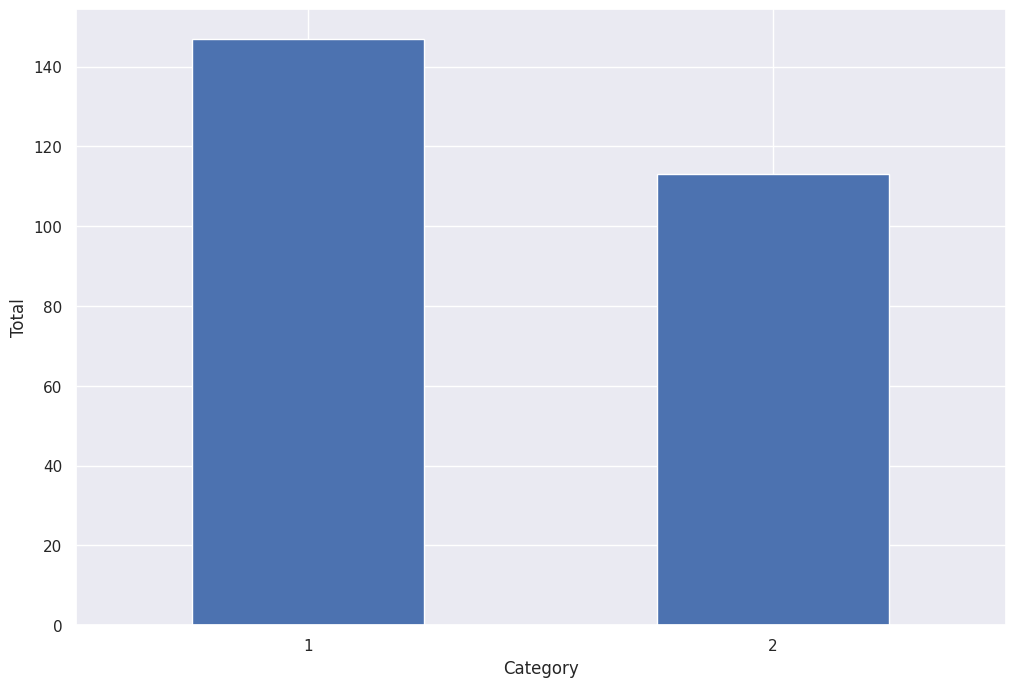

In [46]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Category')
plt.ylabel('Total')
plt.show()

<ipython-input-11-2ae9b7838308>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


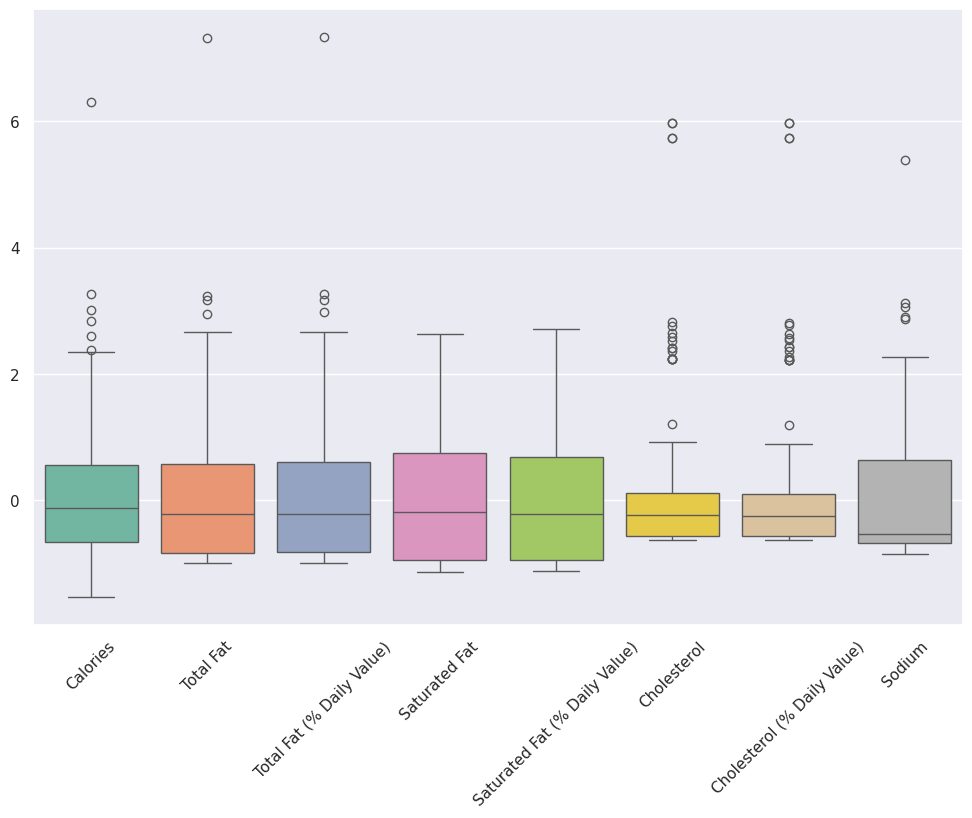

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-12-22fad8361788>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


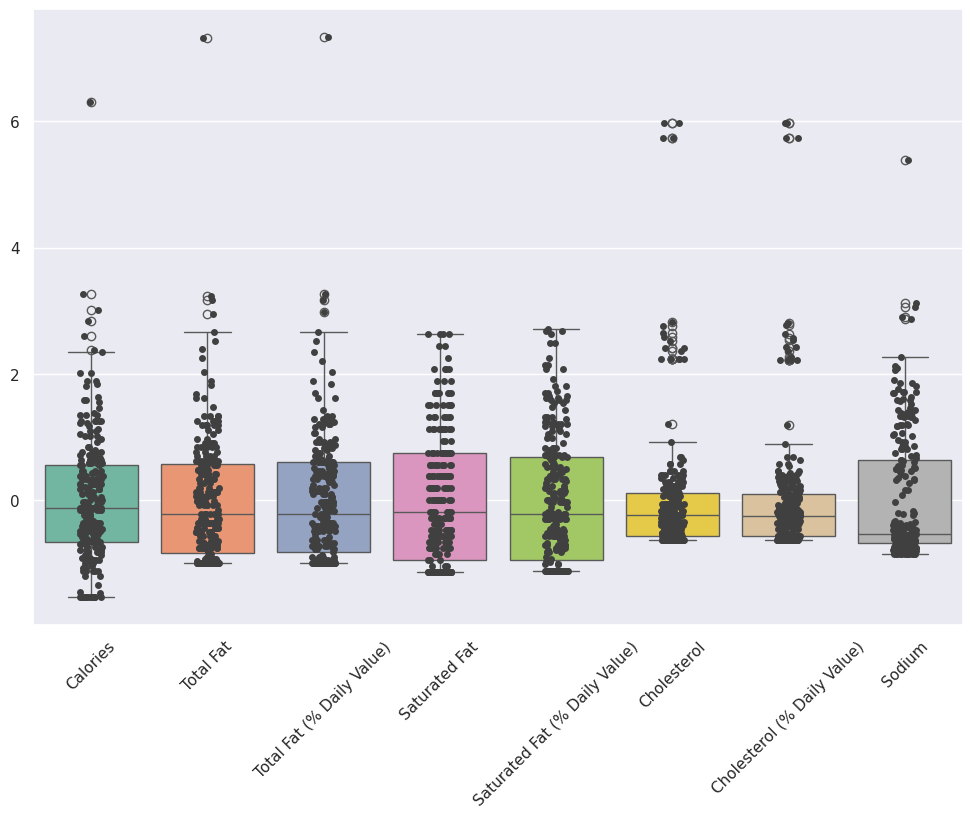

In [12]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [13]:
df.describe()

Calories     Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
count  260.000000  2.600000e+02               2.600000e+02   2.600000e+02   
mean     0.000000 -2.732857e-17              -2.732857e-17   1.366428e-17   
std      1.001929  1.001929e+00               1.001929e+00   1.001929e+00   
min     -1.535688 -9.990642e-01              -9.987325e-01  -1.131045e+00   
25%     -0.659985 -8.315589e-01              -8.270533e-01  -9.427790e-01   
50%     -0.117883 -2.232500e-01              -2.204536e-01  -1.897144e-01   
75%      0.549319  5.701963e-01               6.036063e-01   7.516164e-01   
max      6.303938  7.323306e+00               7.333429e+00   2.634278e+00   

       Saturated Fat (% Daily Value)   Cholesterol  \
count                   2.600000e+02  2.600000e+02   
mean                    6.832142e-17 -2.732857e-17   
std                     1.001929e+00  1.001929e+00   
min                    -1.127030e+00 -6.307865e-01   
25%                    -9.483771e-01 -5.733821e-01   
50%                    -2.243644e-01 -2.289554e-01   
75%                     6.783008e-01  1.154712e-01   
max                     2.709298e+00  5.970725e+00   

       Cholesterol (% Daily Value)      Sodium  
count                   260.000000  260.000000  
mean                      0.000000    0.000000  
std                       1.001929    1.001929  
min                      -0.633439   -0.860803  
25%                      -0.564558   -0.674144  
50%                      -0.254594   -0.530894  
75%                       0.098420    0.641153  
max                       5.979121    5.390113

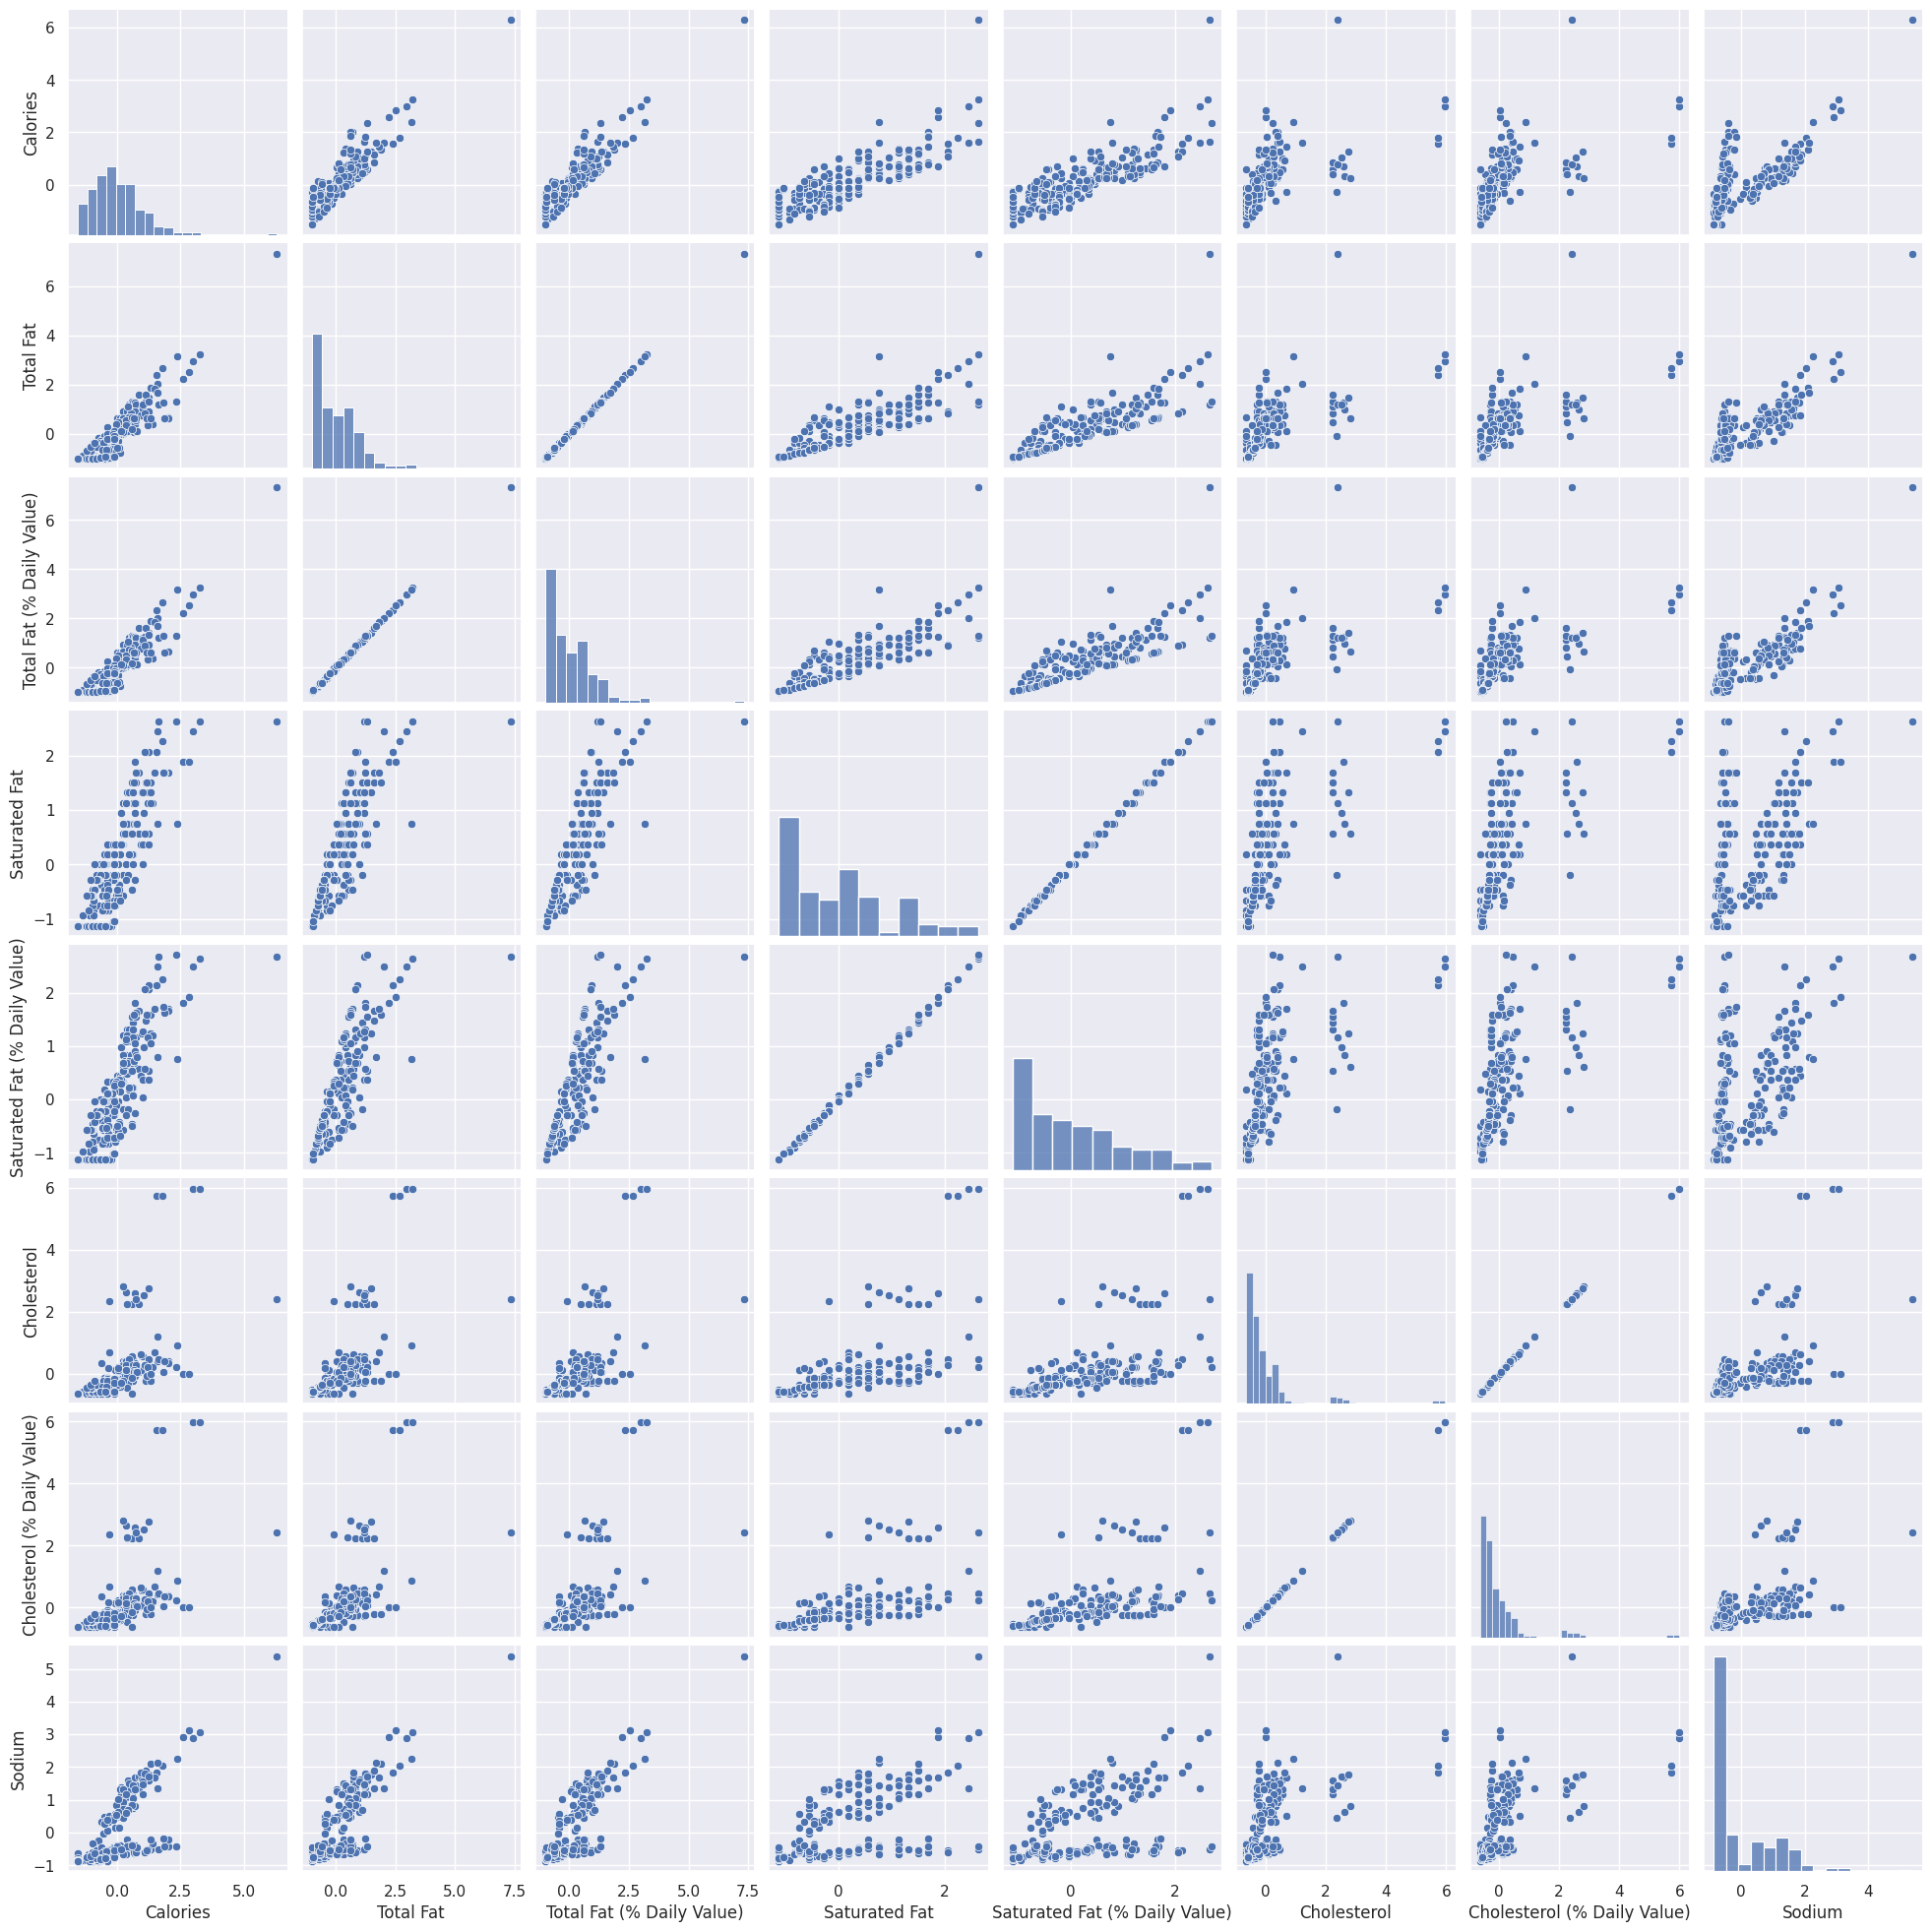

In [14]:
sns.pairplot(df)

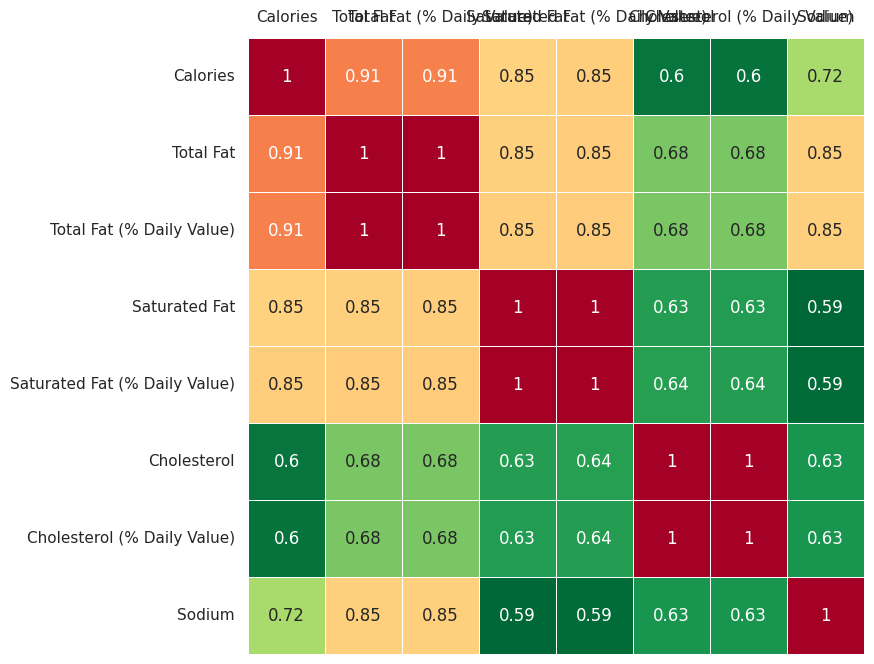

In [15]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Text(0, 0.5, 'A2')

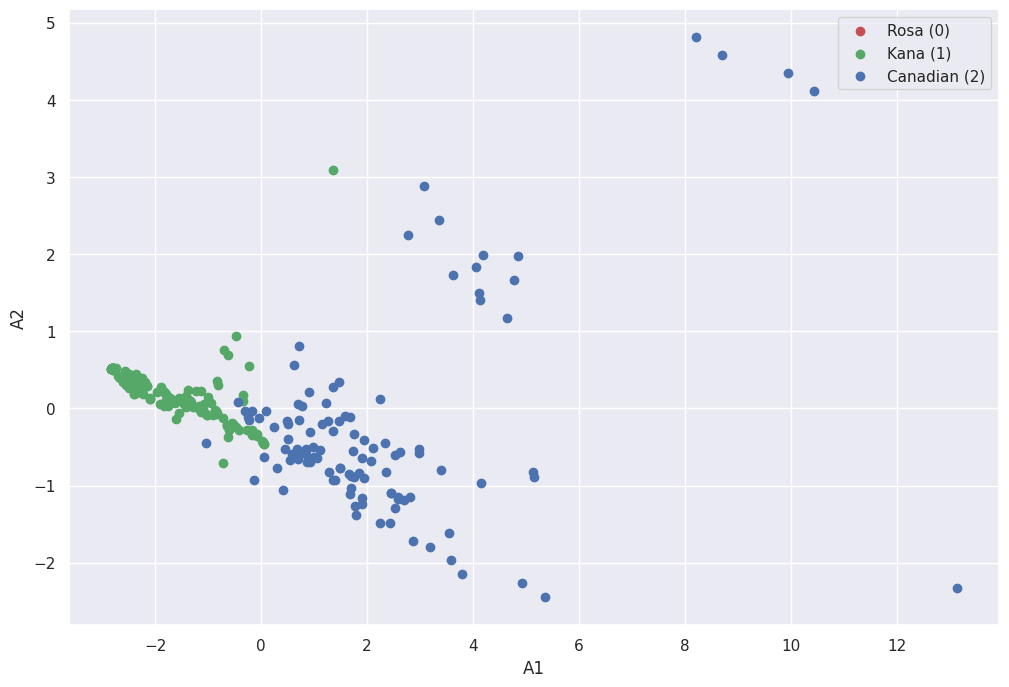

In [16]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('A1')
plt.ylabel('A2')

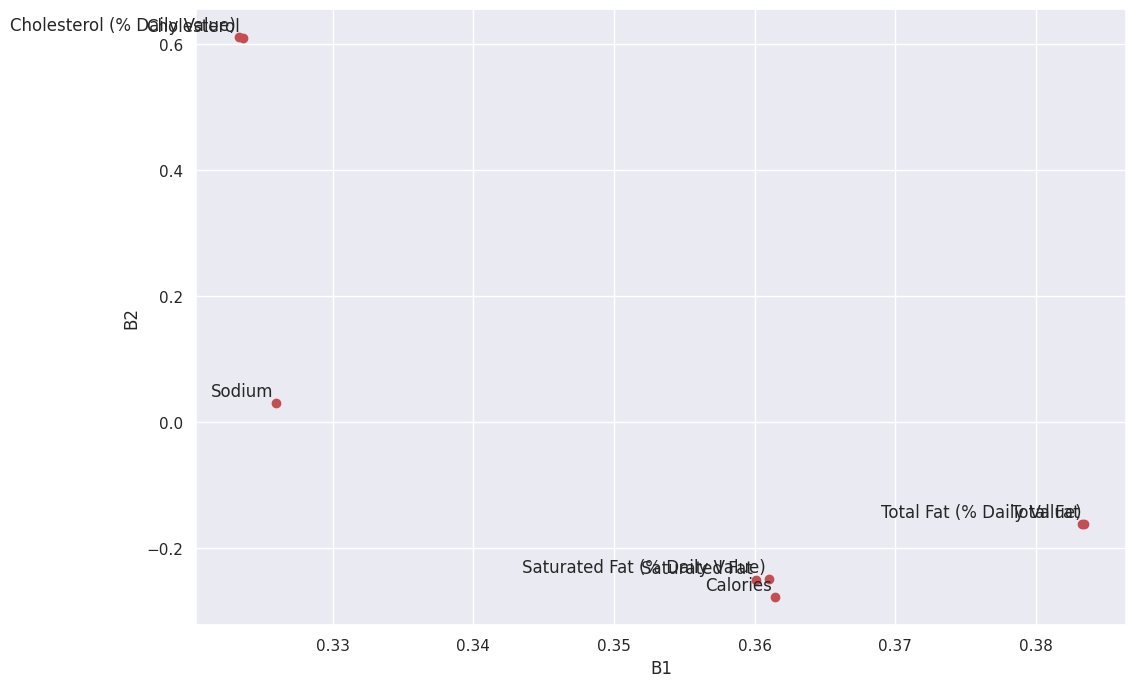

In [17]:
A = pca.components_.T
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


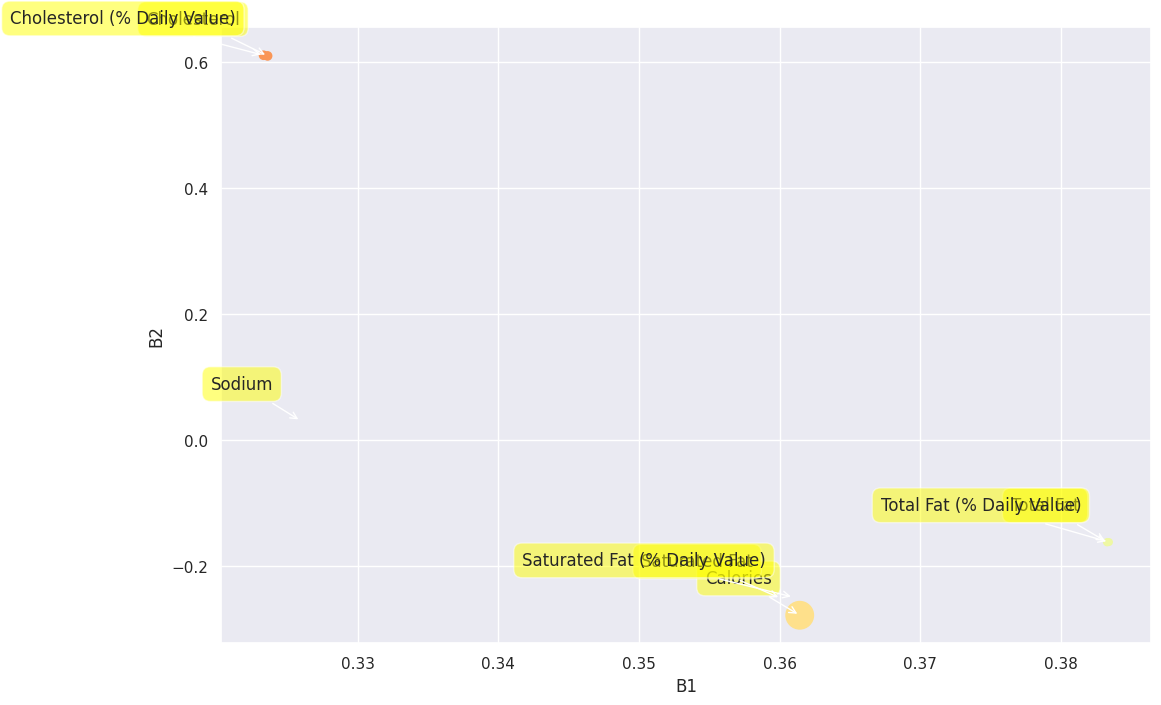

In [18]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

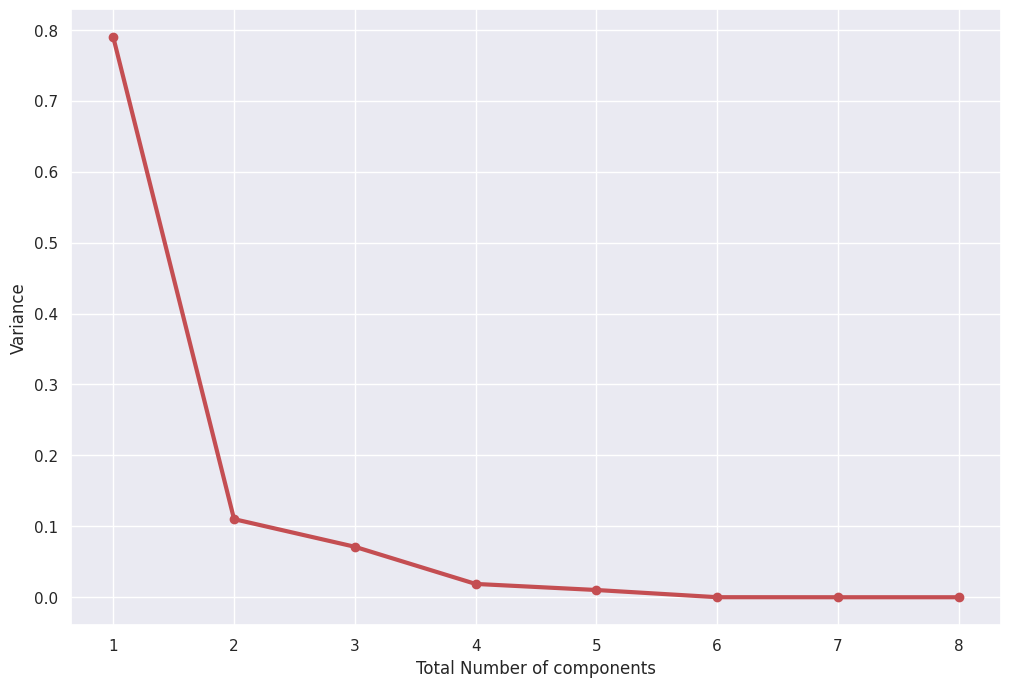

[6.34044682e+00 8.84624778e-01 5.71622639e-01 1.50980600e-01
 8.21317636e-02 7.06736212e-04 2.33289233e-04 1.41407746e-04]


In [19]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Total Number of components')
plt.ylabel('Variance')
plt.show()
print(Lambda)

Text(0, 0.5, 'Cumulative Variance')

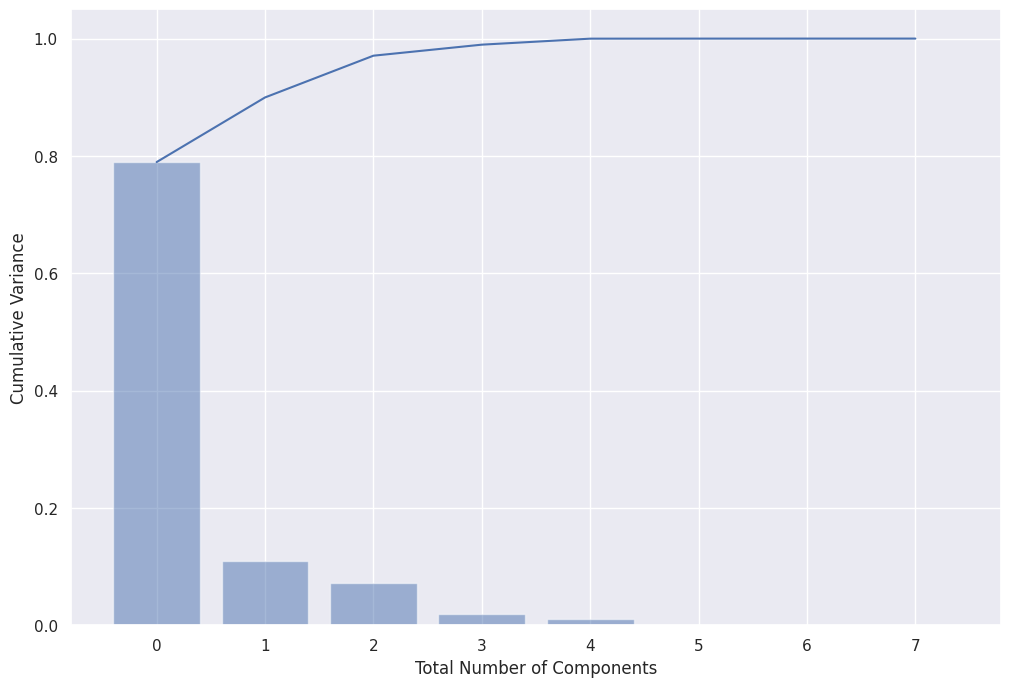

In [20]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Total Number of Components')
plt.ylabel('Cumulative Variance')

In [21]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (79.0%)',
 '1': 'PC 2 (11.0%)',
 '2': 'PC 3 (7.1%)',
 '3': 'PC 4 (1.9%)',
 '4': 'PC 5 (1.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)',
 '7': 'PC 8 (0.0%)'}

[[ 0.36142582 -0.27775428  0.01990556  0.78207859 -0.424459   -0.00219967
   0.00174287 -0.00273199]
 [ 0.38328191 -0.16190051  0.21145969  0.05000496  0.53121019 -0.00660752
  -0.70382031  0.04556925]
 [ 0.38341156 -0.16164043  0.21094537  0.0444376   0.52714416  0.00745288
   0.70769424 -0.04034418]
 [ 0.36007791 -0.25094342 -0.43636581 -0.31933382 -0.13439155 -0.70488059
   0.0055798   0.0057639 ]
 [ 0.36099329 -0.24908091 -0.42976283 -0.31742105 -0.1383012   0.70916947
  -0.00931022 -0.00742282]
 [ 0.32359707  0.60962535 -0.13446018  0.07042659 -0.00432514  0.0065464
   0.04299161  0.70618169]
 [ 0.32330687  0.61066999 -0.13486169  0.07049248  0.00365252 -0.00749702
  -0.04275924 -0.70533685]
 [ 0.32595594  0.03063253  0.70640795 -0.41378566 -0.47175096 -0.00435029
  -0.00289093 -0.00271194]]


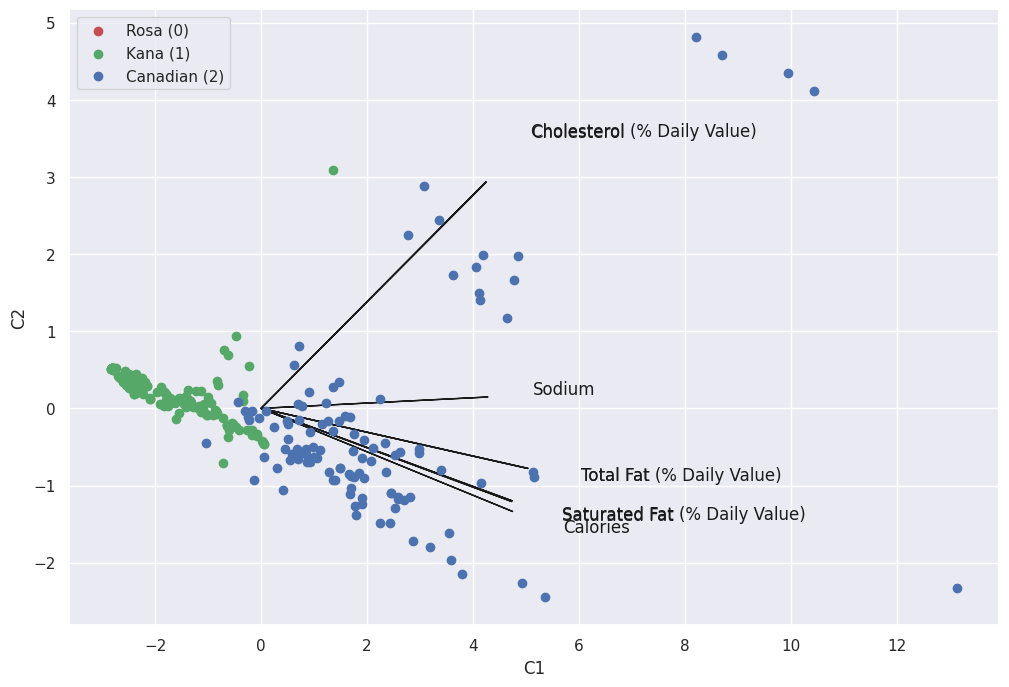

In [22]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('C1')
plt.ylabel('C2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')
print(A)

In [23]:
!pip install pca

In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [25]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC                        feature   loading  type
0  PC1      Total Fat (% Daily Value)  0.383412  best
1  PC2    Cholesterol (% Daily Value)  0.610670  best
2  PC3                         Sodium  0.706408  best
3  PC1                       Calories  0.361426  weak
4  PC1                      Total Fat  0.383282  weak
5  PC3                  Saturated Fat -0.436366  weak
6  PC3  Saturated Fat (% Daily Value) -0.429763  weak
7  PC2                    Cholesterol  0.609625  weak


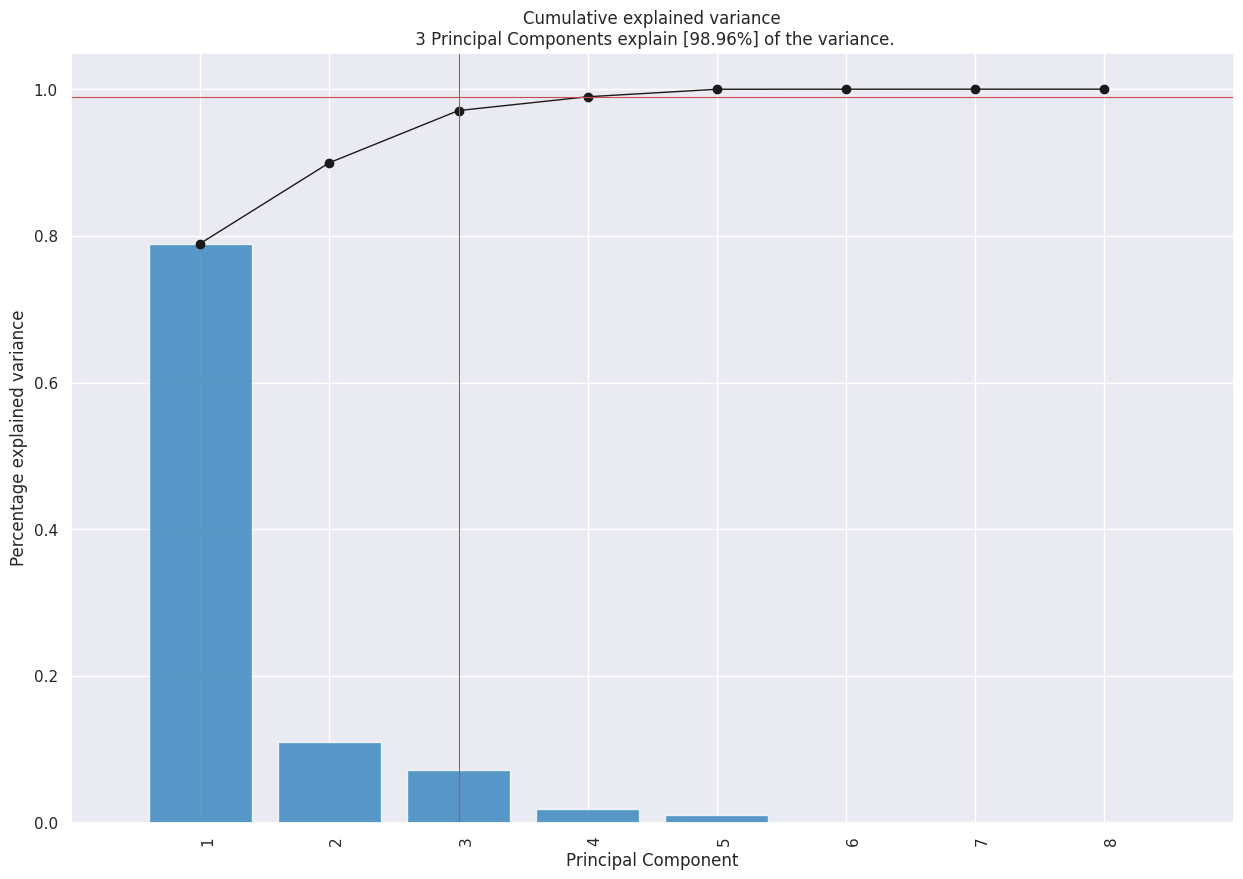

In [26]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


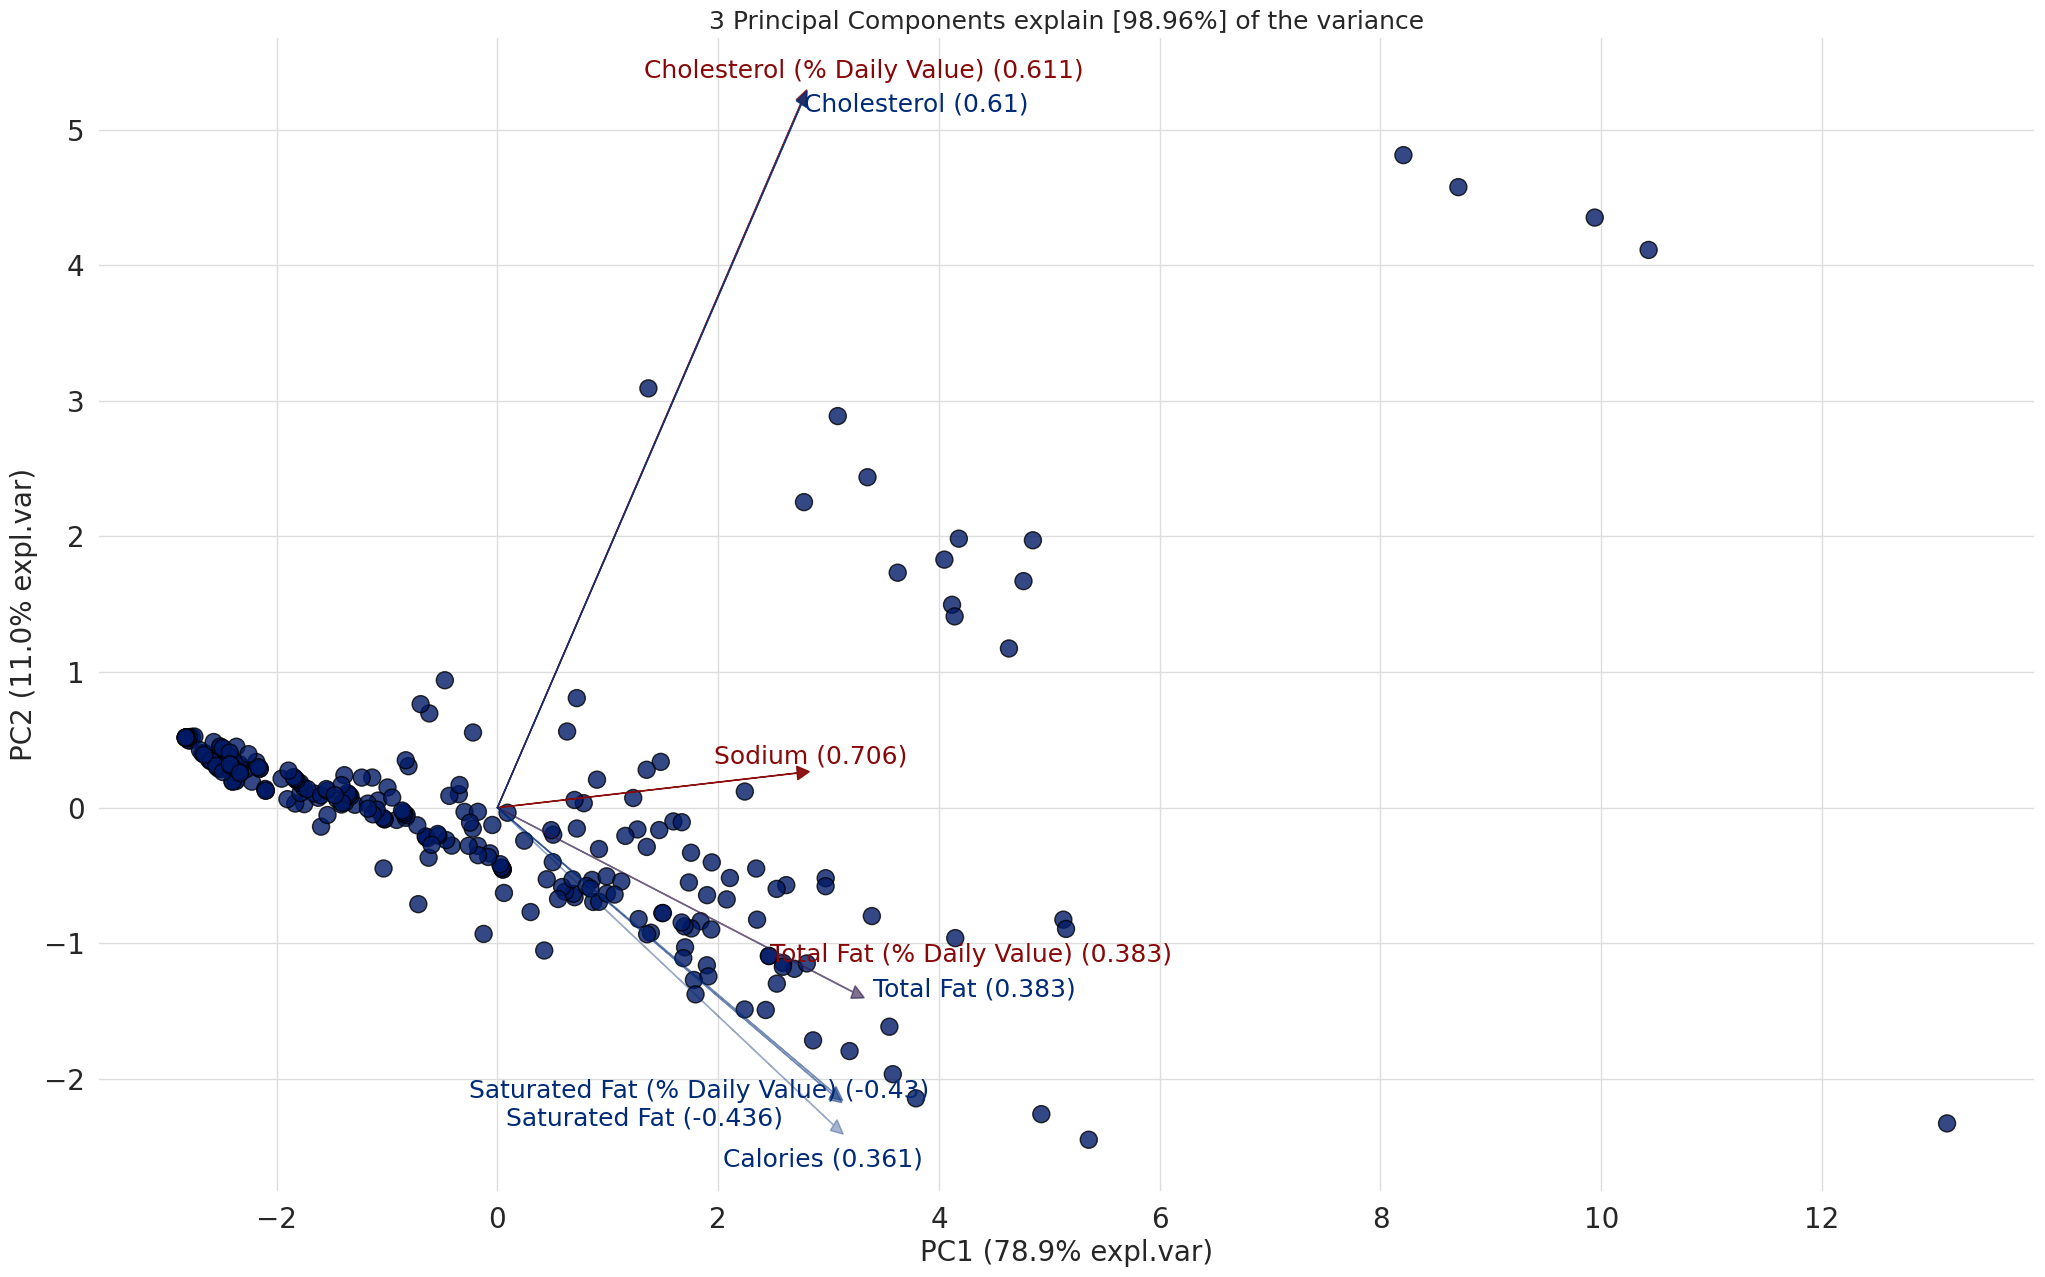

In [27]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.96%] of the variance'}, xlabel='PC1 (78.9% expl.var)', ylabel='PC2 (11.0% expl.var)'>)

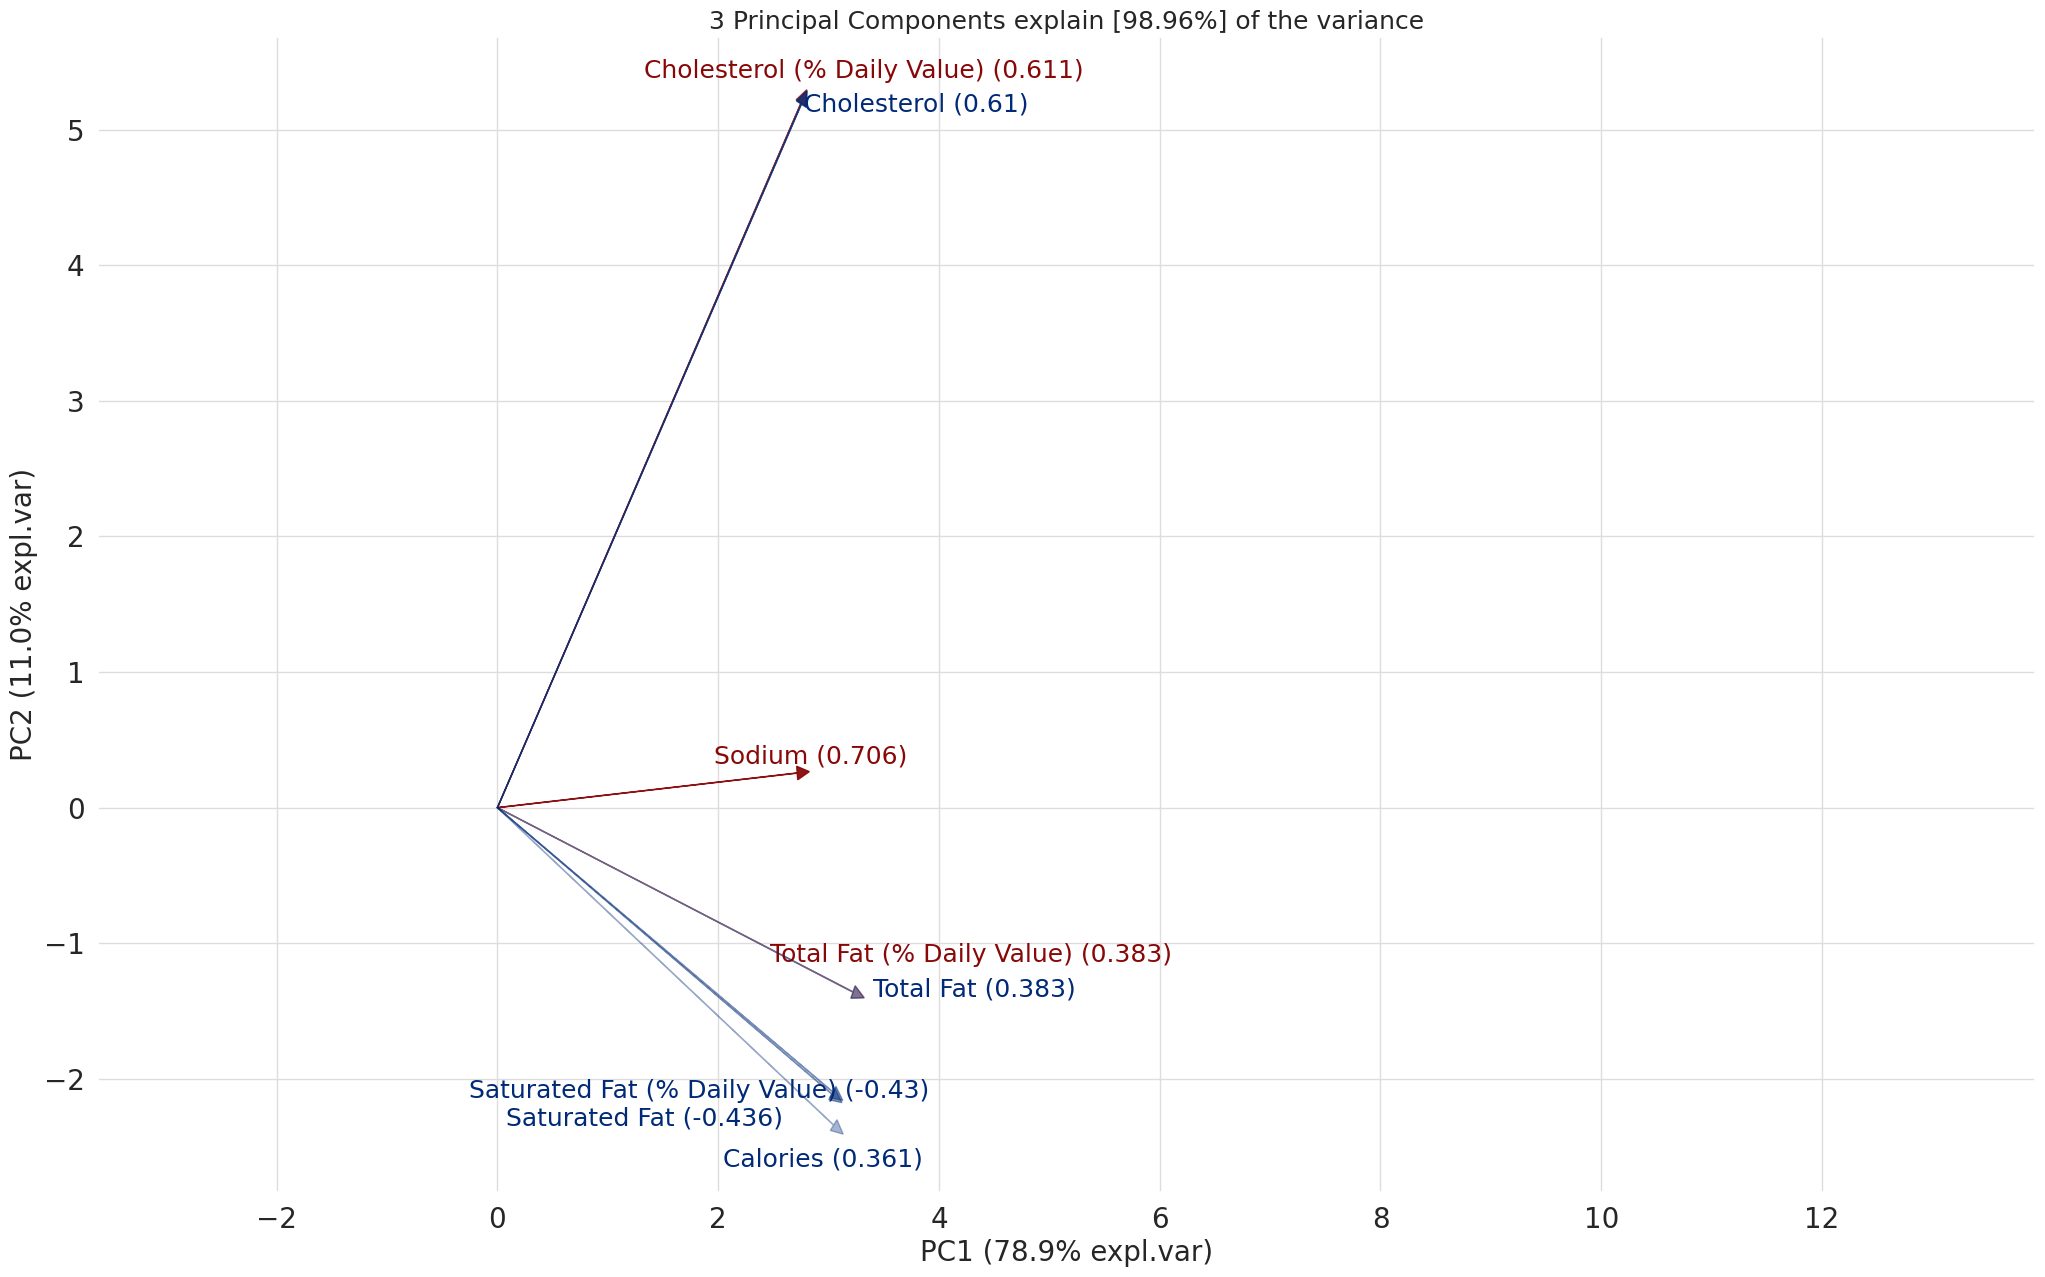

In [28]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


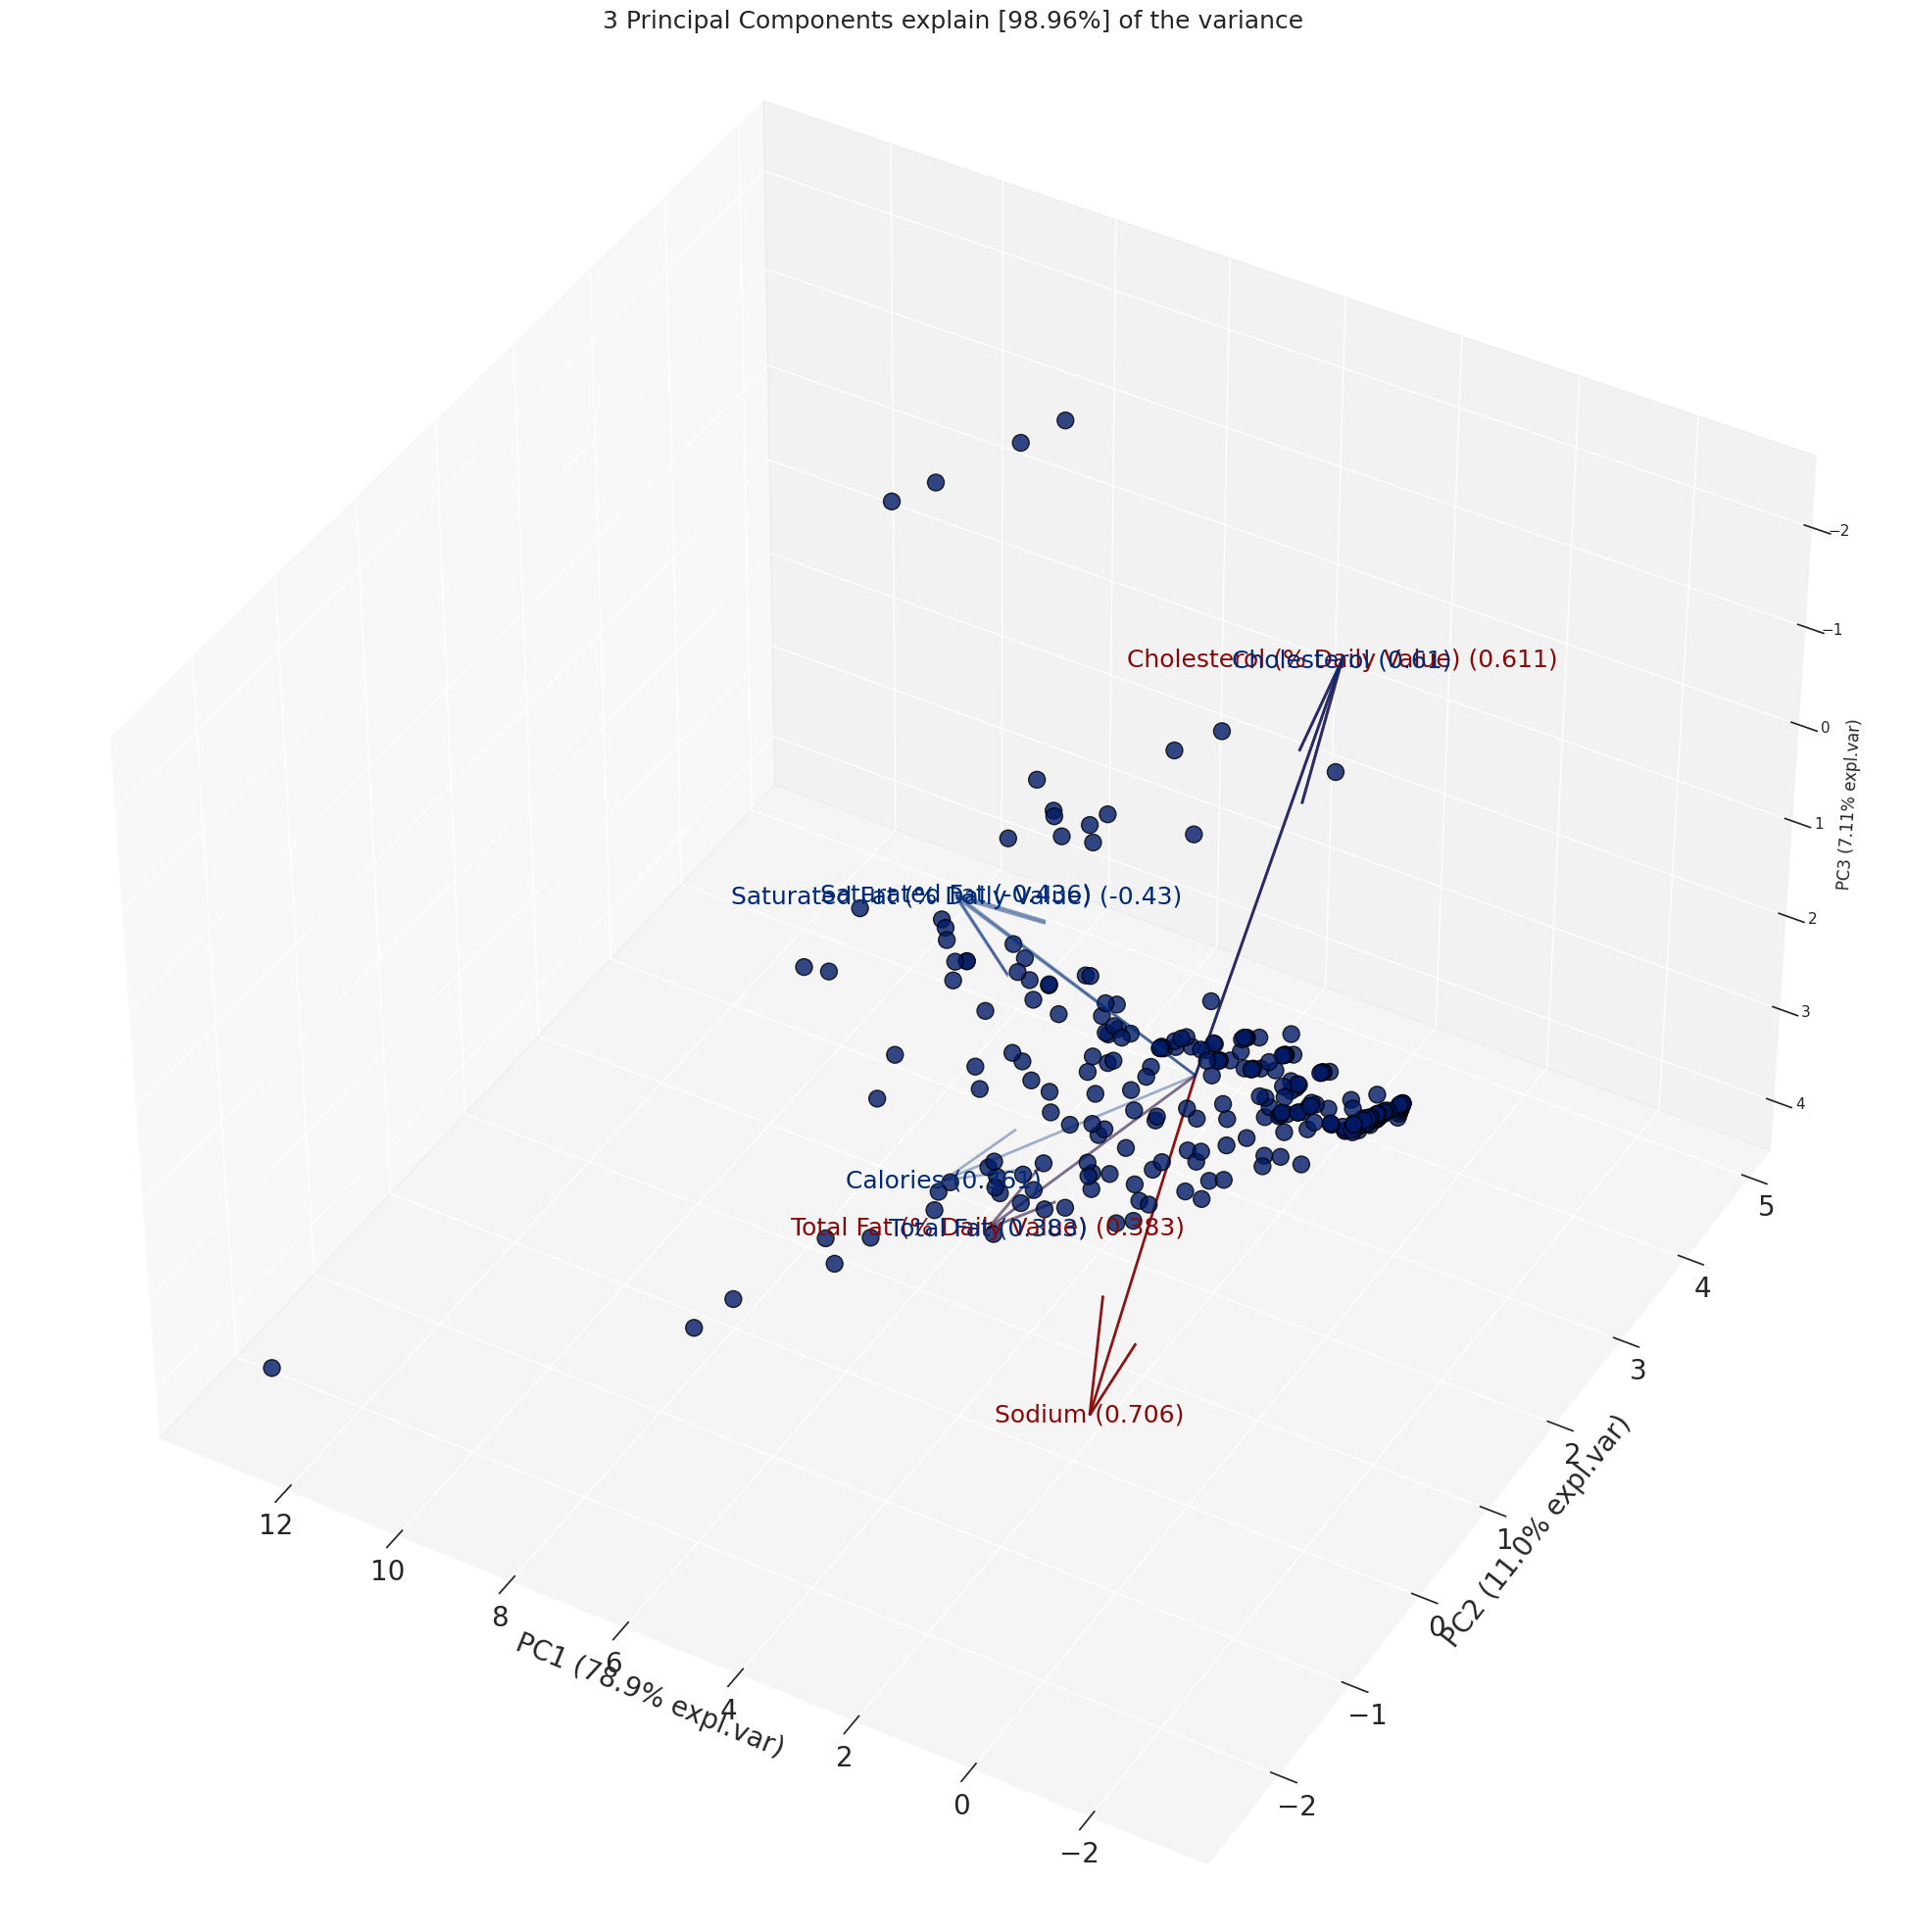

In [29]:
ax = model.biplot3d(legend=False)

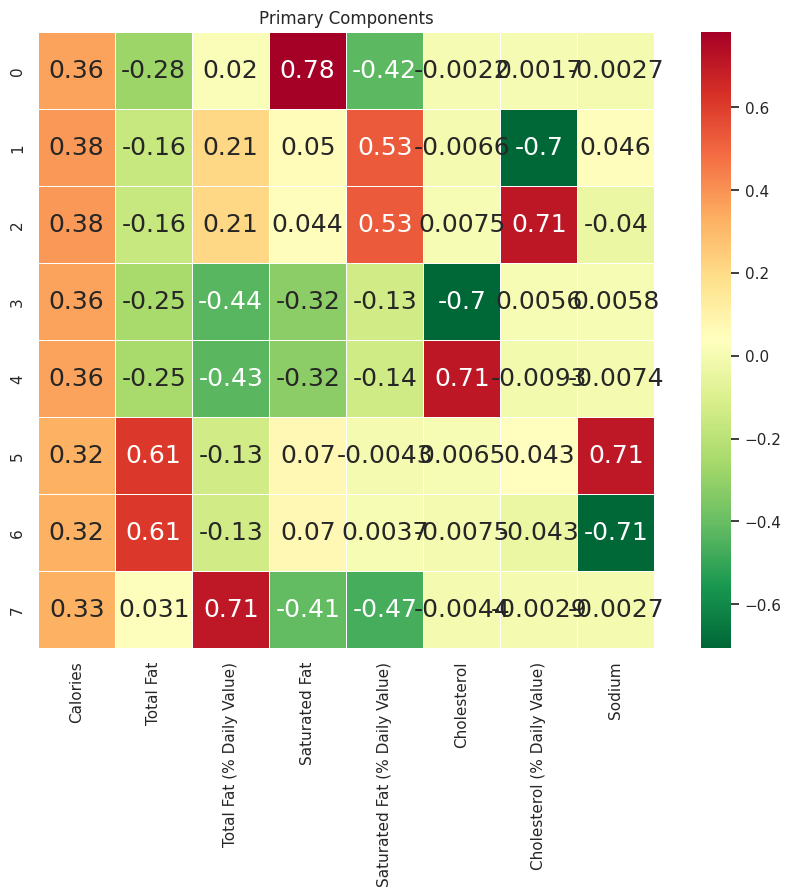

PC1:[0.36142582 0.38328191 0.38341156 0.36007791 0.36099329 0.32359707
 0.32330687 0.32595594]
PC2:[-0.27775428 -0.16190051 -0.16164043 -0.25094342 -0.24908091  0.60962535
  0.61066999  0.03063253]
[[ 0.36142582 -0.27775428  0.01990556  0.78207859 -0.424459   -0.00219967
   0.00174287 -0.00273199]
 [ 0.38328191 -0.16190051  0.21145969  0.05000496  0.53121019 -0.00660752
  -0.70382031  0.04556925]
 [ 0.38341156 -0.16164043  0.21094537  0.0444376   0.52714416  0.00745288
   0.70769424 -0.04034418]
 [ 0.36007791 -0.25094342 -0.43636581 -0.31933382 -0.13439155 -0.70488059
   0.0055798   0.0057639 ]
 [ 0.36099329 -0.24908091 -0.42976283 -0.31742105 -0.1383012   0.70916947
  -0.00931022 -0.00742282]
 [ 0.32359707  0.60962535 -0.13446018  0.07042659 -0.00432514  0.0065464
   0.04299161  0.70618169]
 [ 0.32330687  0.61066999 -0.13486169  0.07049248  0.00365252 -0.00749702
  -0.04275924 -0.70533685]
 [ 0.32595594  0.03063253  0.70640795 -0.41378566 -0.47175096 -0.00435029
  -0.00289093 -0.00271

In [30]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Primary Components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')
print (A)

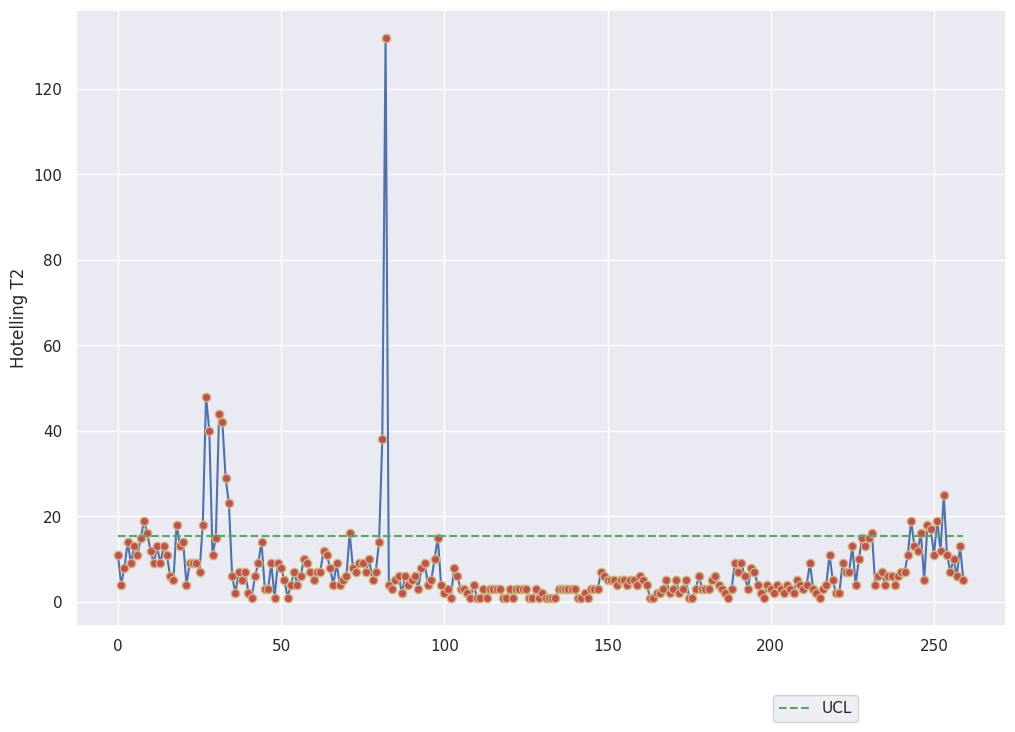

In [31]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling T2')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [32]:
print(np.argwhere(Tsquare>UCL))

[[  8]
 [  9]
 [ 18]
 [ 26]
 [ 27]
 [ 28]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 71]
 [ 81]
 [ 82]
 [231]
 [243]
 [246]
 [248]
 [249]
 [251]
 [253]]


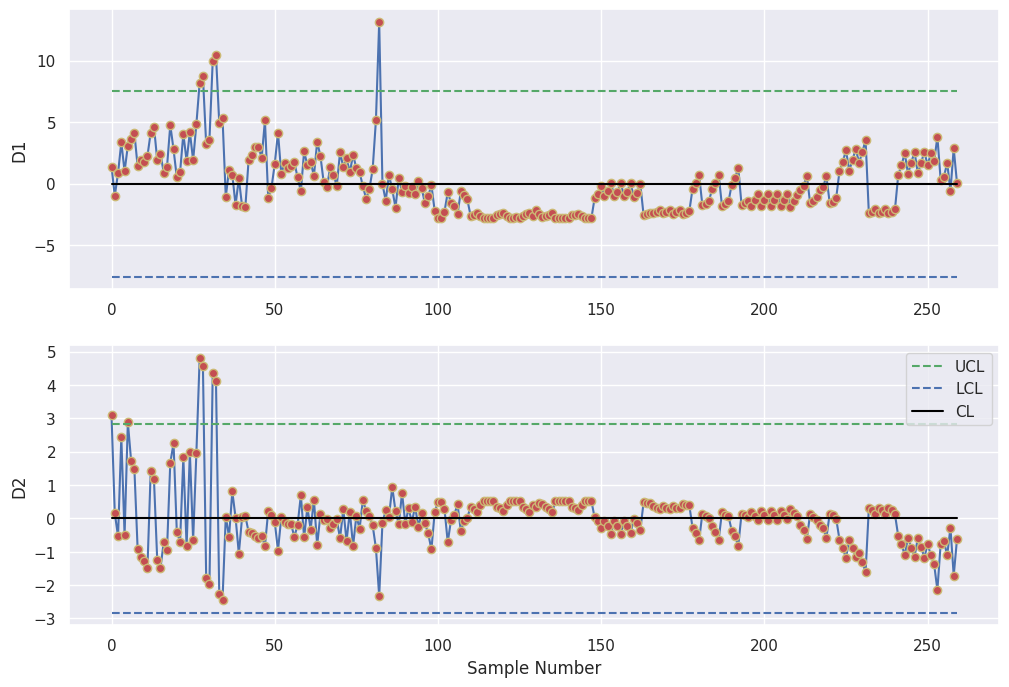

In [33]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('D1')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('D2')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

In [34]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[27]
 [28]
 [31]
 [32]
 [82]]
[]
[[ 0]
 [ 5]
 [27]
 [28]
 [31]
 [32]]


In [47]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 182
Test Dataset Size: 78


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.938     0.957     0.947        47
           2      0.933     0.903     0.918        31

    accuracy                          0.936        78
   macro avg      0.935     0.930     0.933        78
weighted avg      0.936     0.936     0.936        78



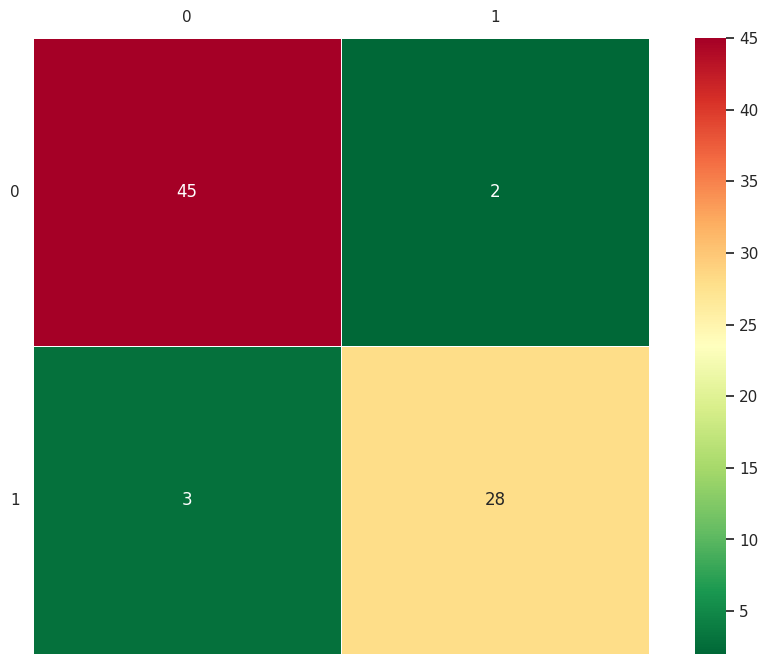

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.940     1.000     0.969        47
           2      1.000     0.903     0.949        31

    accuracy                          0.962        78
   macro avg      0.970     0.952     0.959        78
weighted avg      0.964     0.962     0.961        78



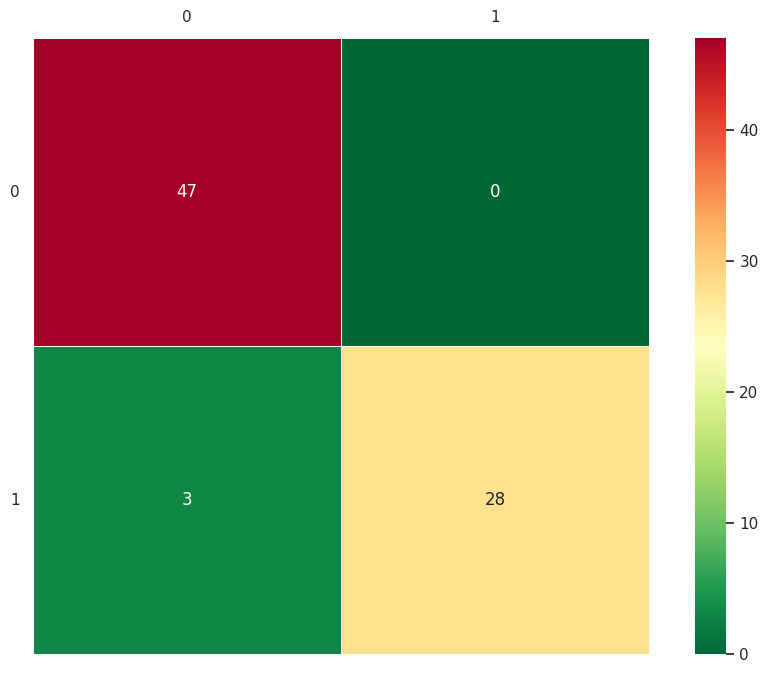

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.918     0.957     0.938        47
           2      0.931     0.871     0.900        31

    accuracy                          0.923        78
   macro avg      0.925     0.914     0.919        78
weighted avg      0.923     0.923     0.923        78



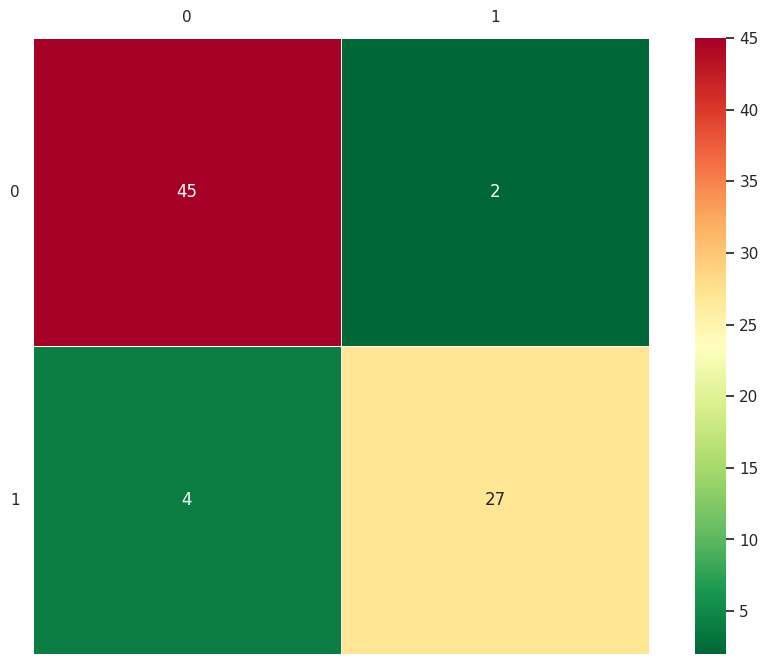

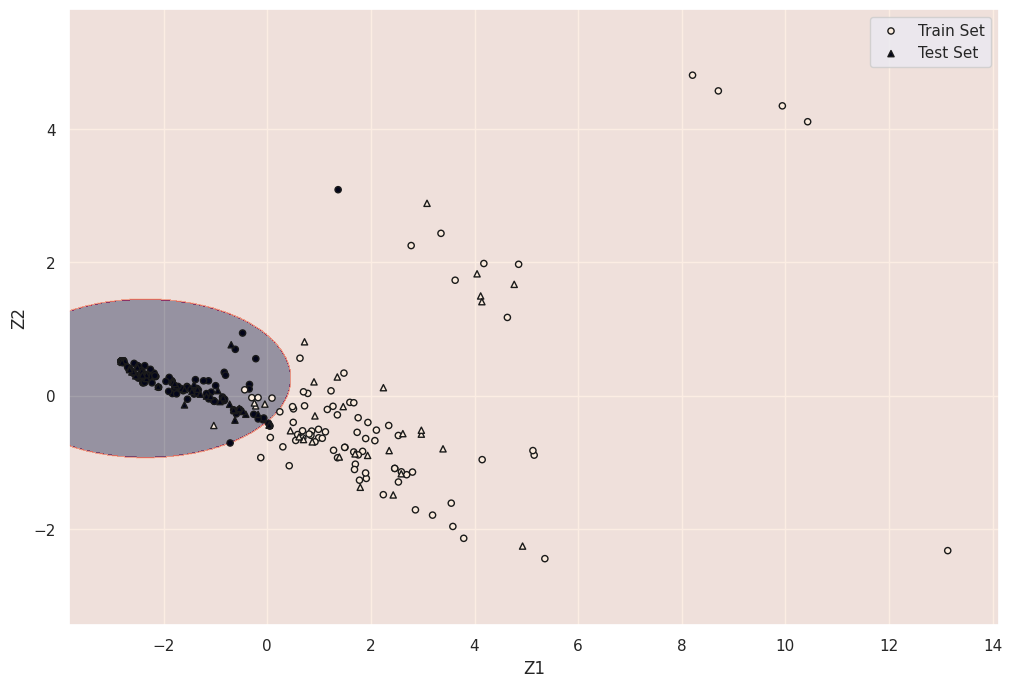

(array([19, 26, 31, 45, 60, 75]),)


In [48]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

Grid Search Results:
k_full_data: {'n_neighbors': 8}
k_Z: {'n_neighbors': 8}
k_Z12: {'n_neighbors': 8}
                                    0         1         2         3         4
knn_full_data fit_time       0.015480  0.011054  0.006038  0.003744  0.003705
knn_Z  fit_time              0.002051  0.001927  0.001800  0.001773  0.001873
knn_Z12 fit_time             0.001693  0.001993  0.001866  0.001864  0.002483
knn_full_data test_f1_macro  1.000000  0.945588  0.971676  0.942857  1.000000
knn_Z  test_f1_macro         1.000000  0.945588  0.971676  0.942857  1.000000
knn_Z12 test_f1_macro        0.972653  0.889881  0.942857  0.971676  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.979     1.000     0.989        47
           2      1.000     0.968     0.984        31

    accuracy                          0.987        78
   macro avg      0.990     0.984     0.987        78
weighted avg      0.987     0.987   

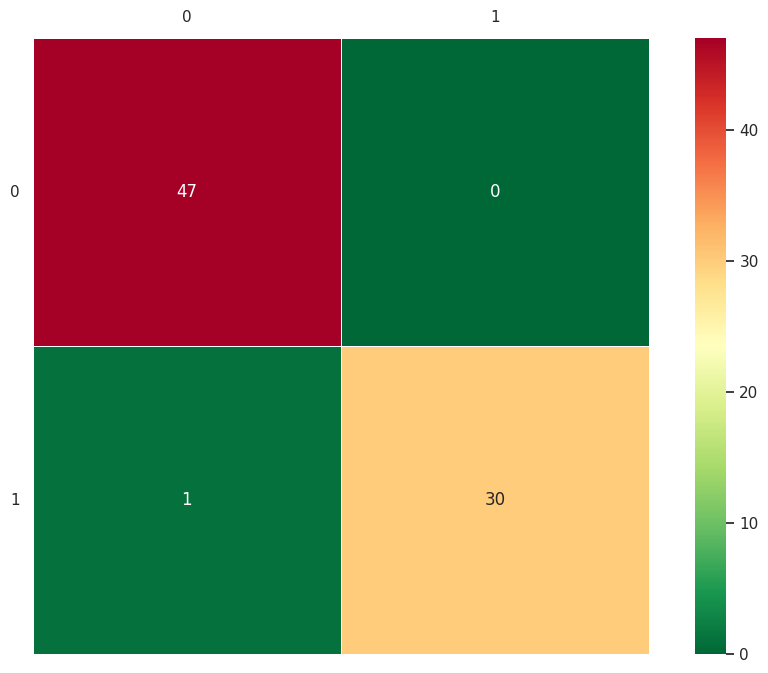

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.979     1.000     0.989        47
           2      1.000     0.968     0.984        31

    accuracy                          0.987        78
   macro avg      0.990     0.984     0.987        78
weighted avg      0.987     0.987     0.987        78



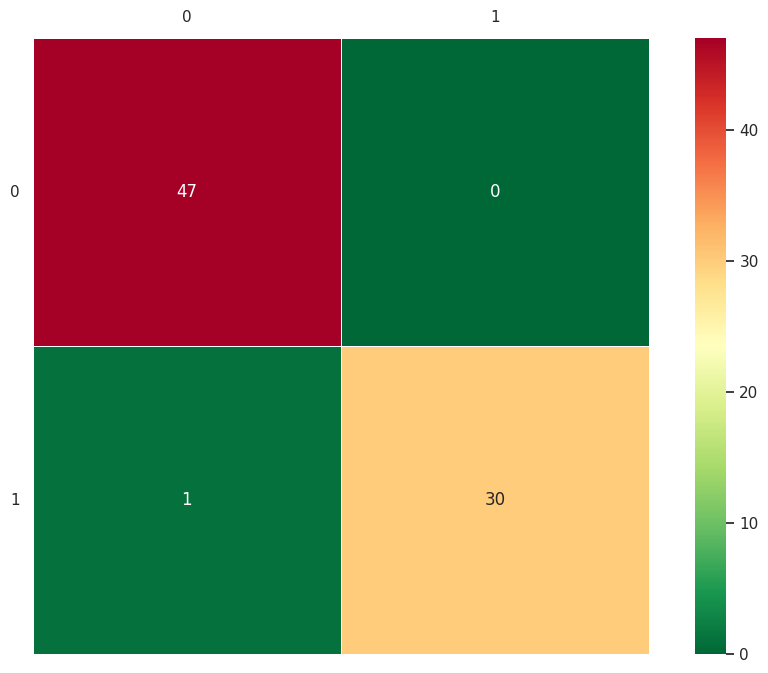

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.922     1.000     0.959        47
           2      1.000     0.871     0.931        31

    accuracy                          0.949        78
   macro avg      0.961     0.935     0.945        78
weighted avg      0.953     0.949     0.948        78



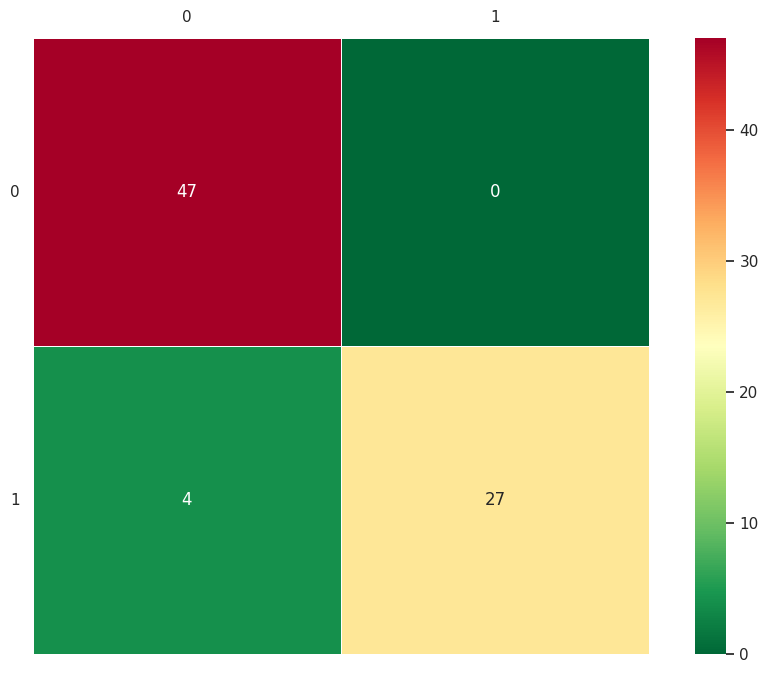

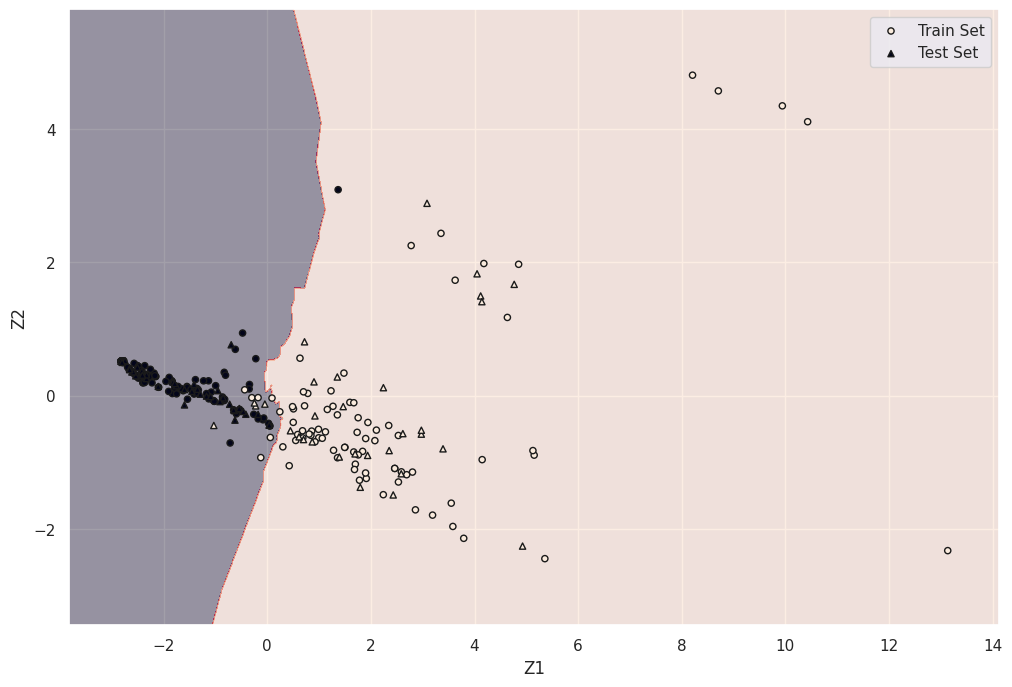

In [49]:
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.011054  0.016317  0.011018  0.013580  0.008491
dt_Z  fit_time              0.002218  0.001952  0.009614  0.011141  0.002158
dt_Z12 fit_time             0.006678  0.001705  0.001802  0.006829  0.001725
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.972653  0.917960  0.971676  0.883117  0.944272
dt_Z12 test_f1_macro        0.972653  0.917960  0.971676  0.883117  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        47
           2      1.000     1.000     1.000        31

    accuracy                          1.000        78
   macro avg      1.000     1.000     1.000        78
weighted avg      1.000     1.000    

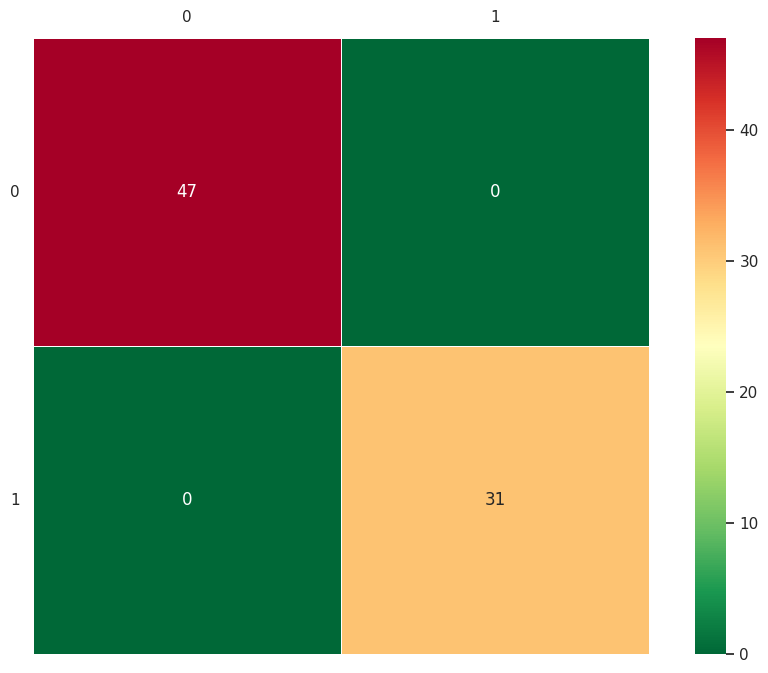

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.939     0.979     0.958        47
           2      0.966     0.903     0.933        31

    accuracy                          0.949        78
   macro avg      0.952     0.941     0.946        78
weighted avg      0.949     0.949     0.948        78



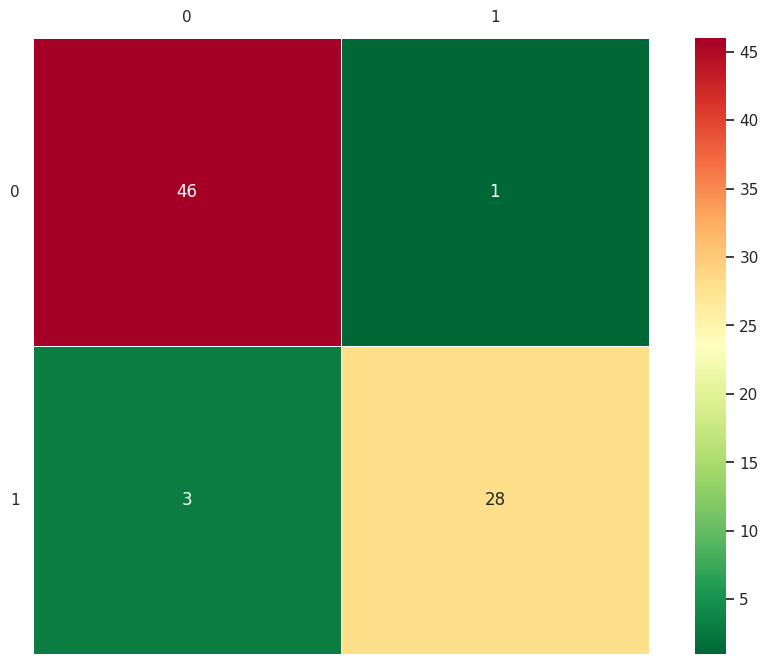

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.922     1.000     0.959        47
           2      1.000     0.871     0.931        31

    accuracy                          0.949        78
   macro avg      0.961     0.935     0.945        78
weighted avg      0.953     0.949     0.948        78



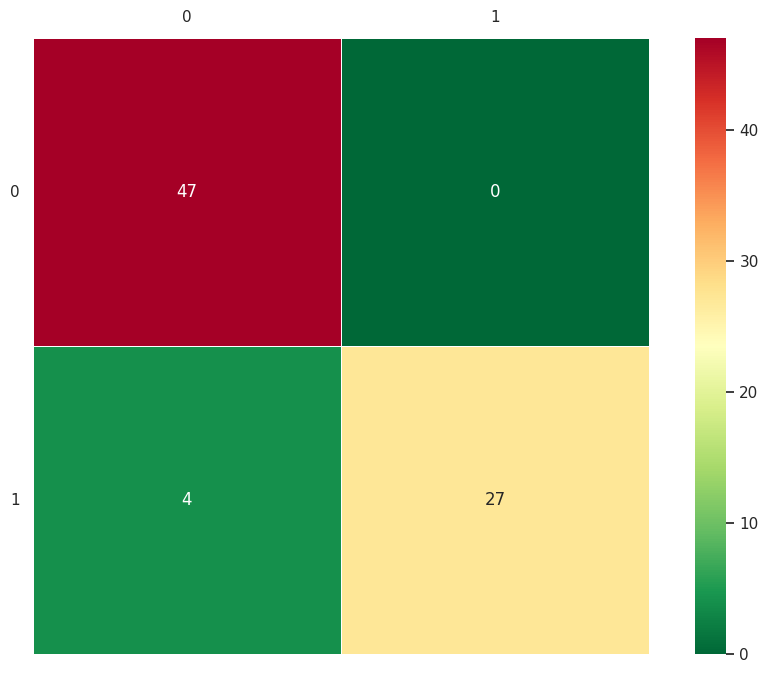

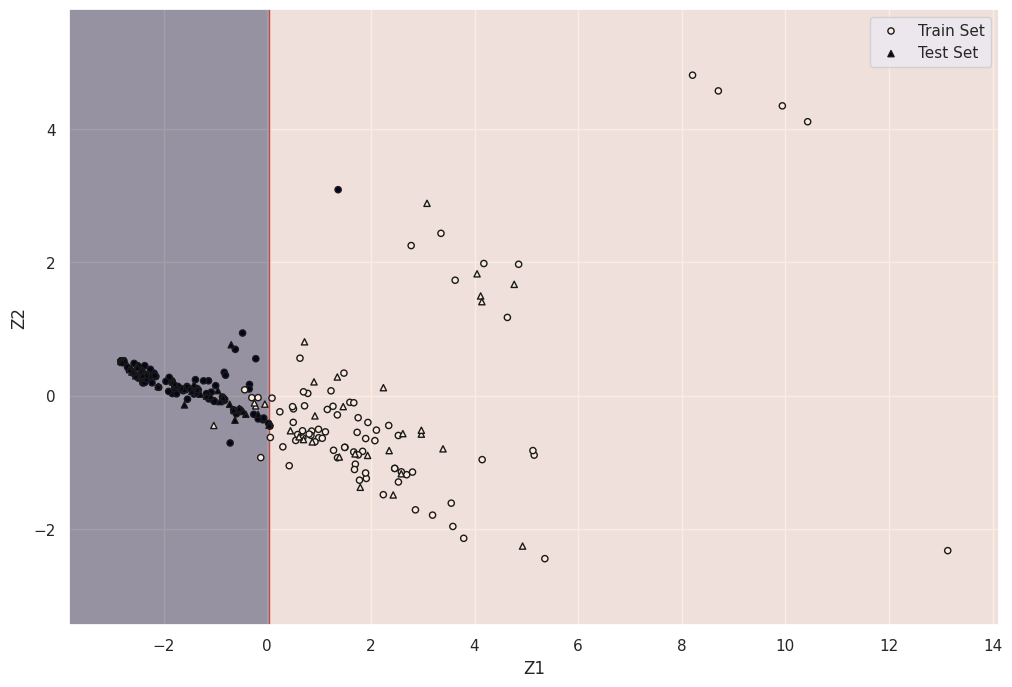

In [50]:
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


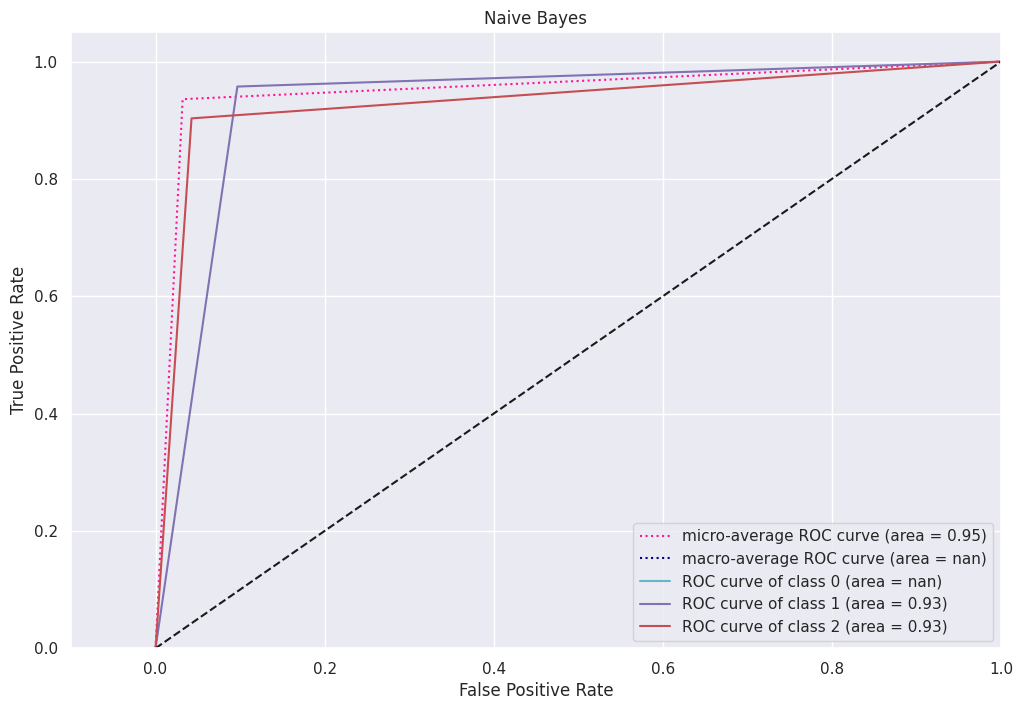

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


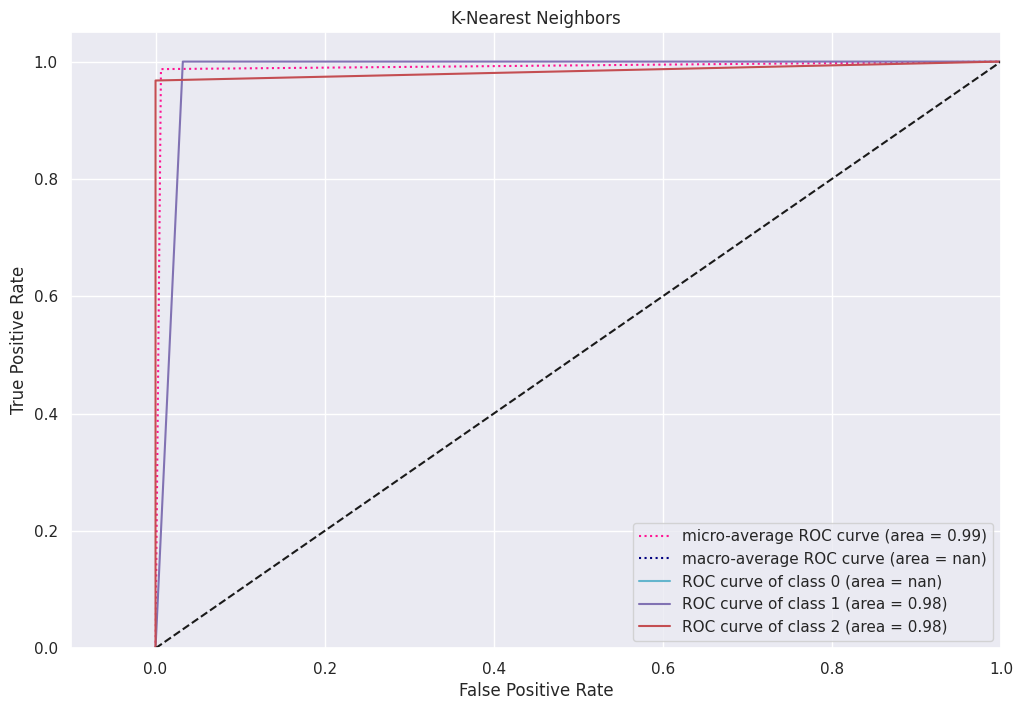

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


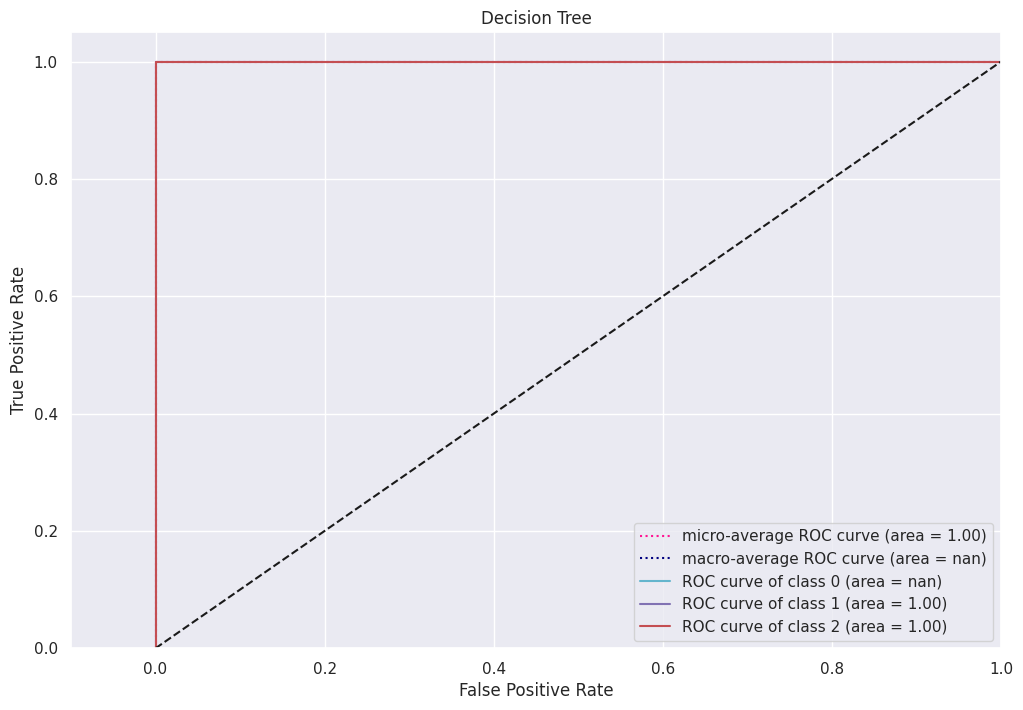

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


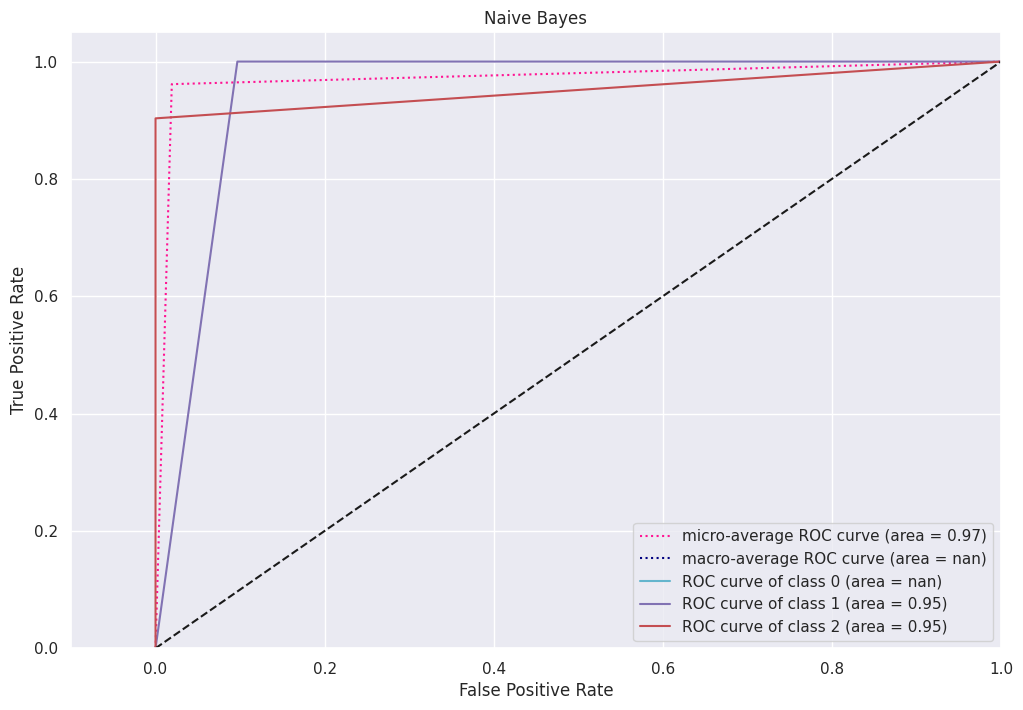

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


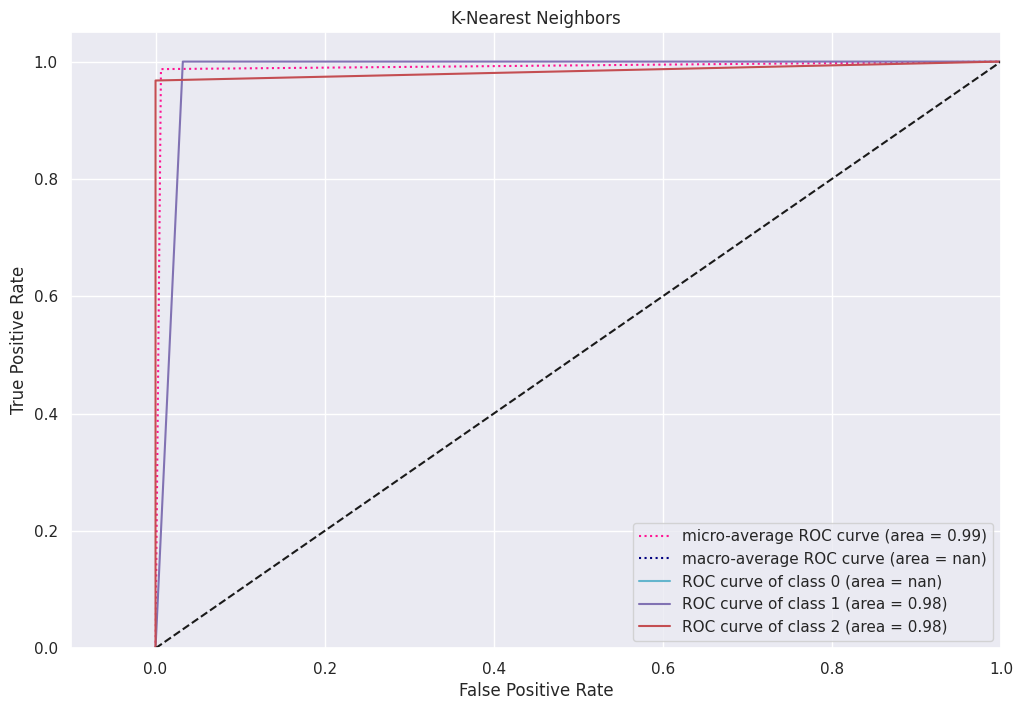

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


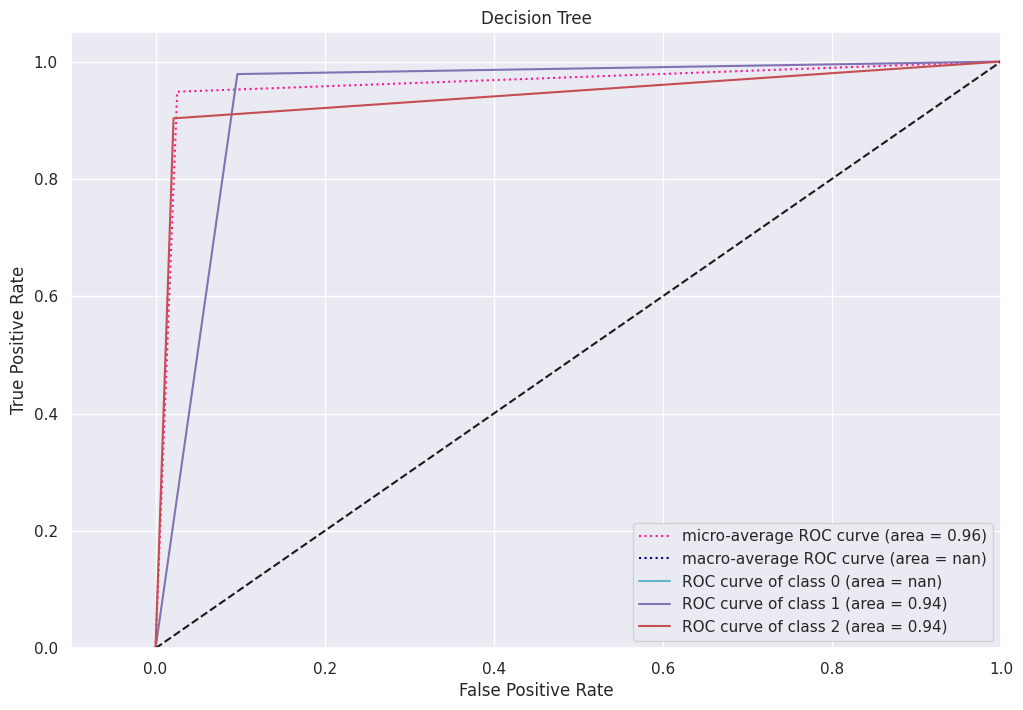

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


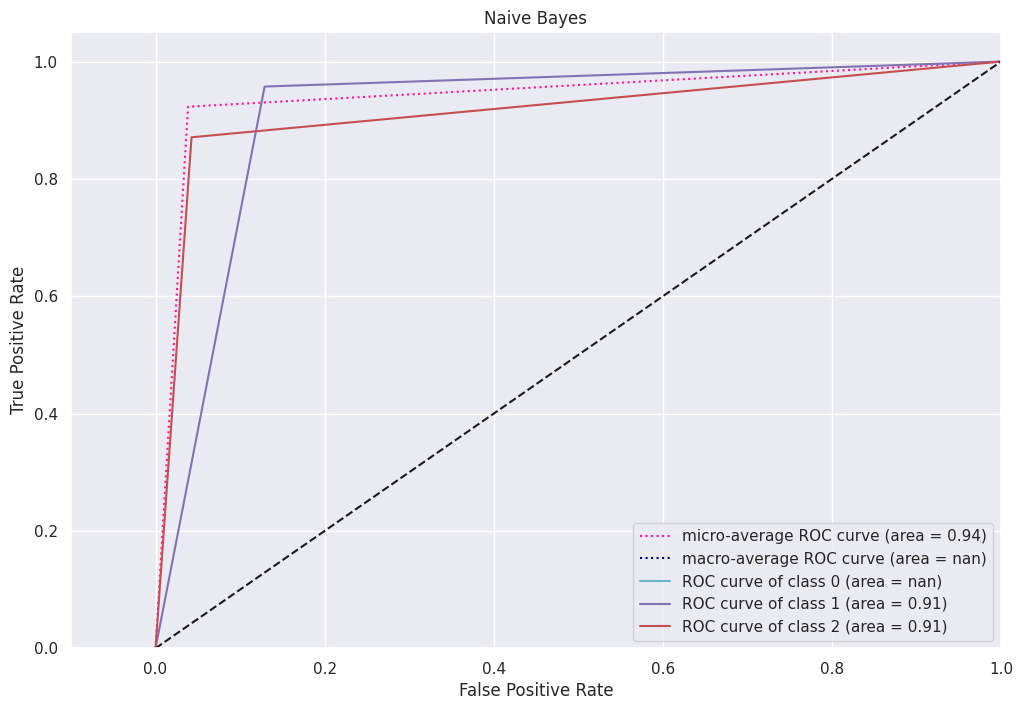

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


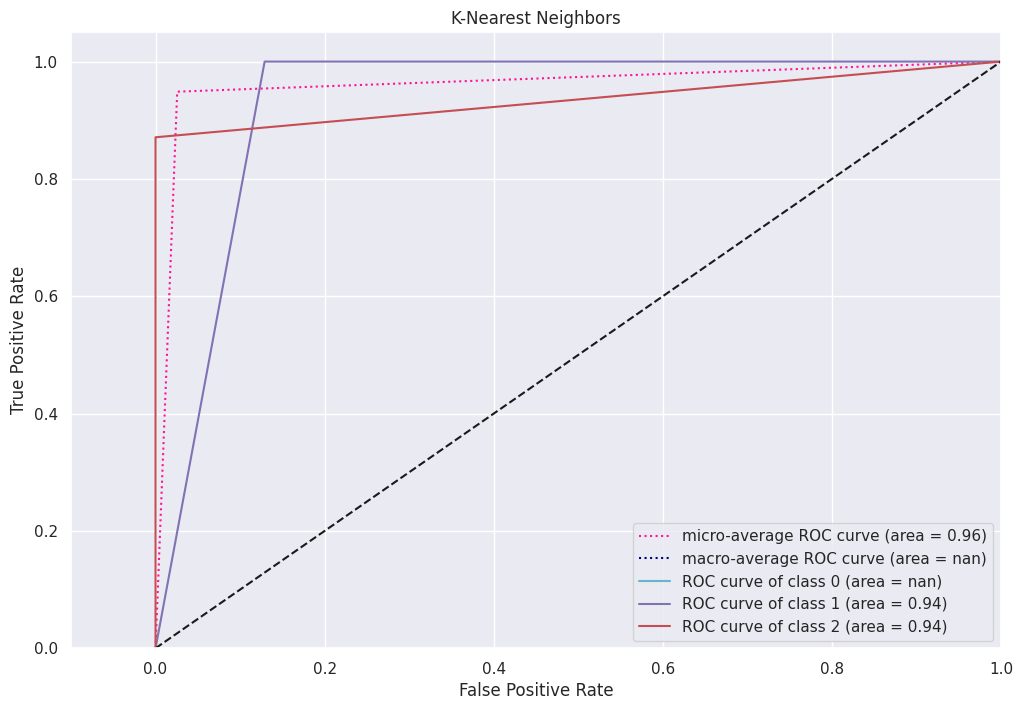

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


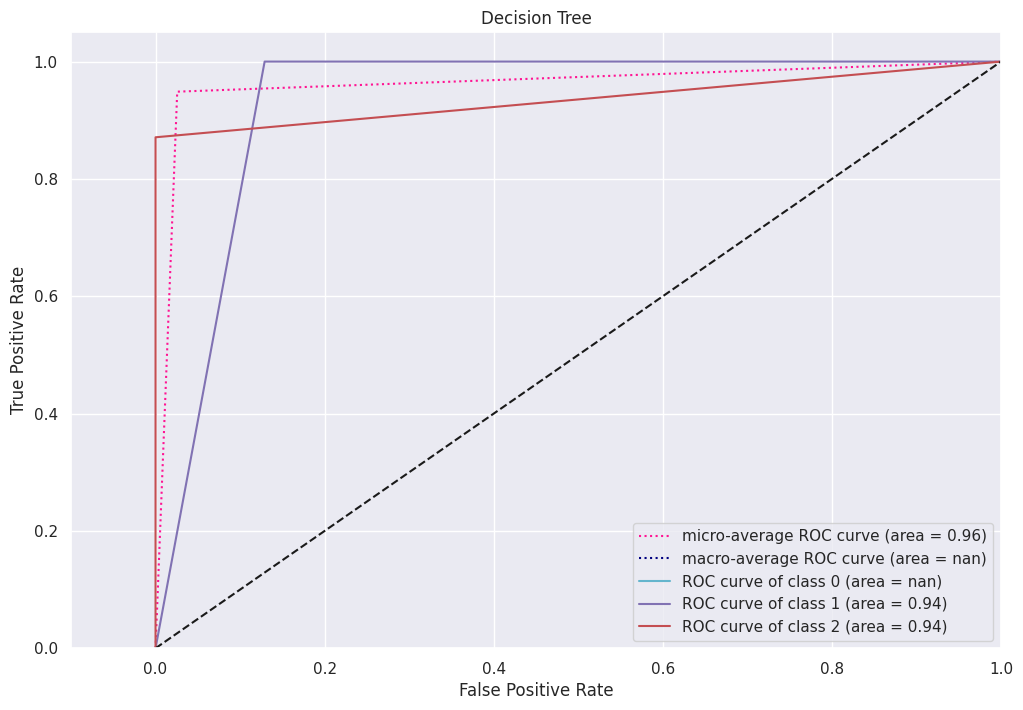

In [51]:
datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

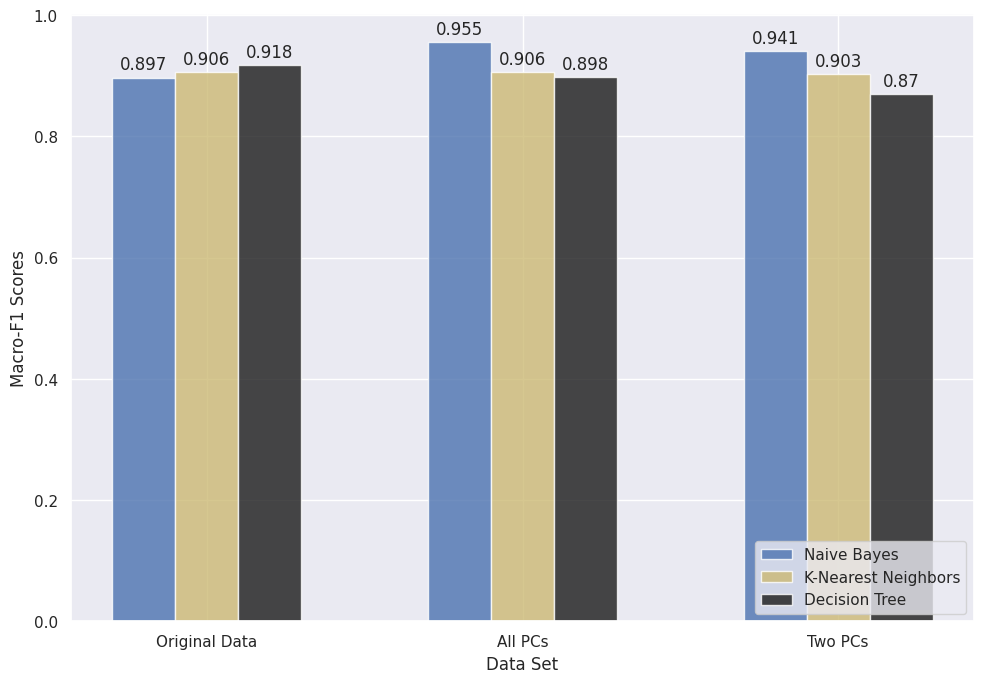

In [52]:
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()